# Red and White Wine Quality - EDA & Classification Models

<h3 style='color:blue'>Table Of Contents:</h3>

1. [Data Source](#Data-Source)
2. [Load Data](#Load-Data)
3. [Data Preparation](#Data-Preparation)
4. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
    - 4.1 [Univariate Analysis](#Univariate-Analysis)
    - 4.2 [Bivariate Analysis](#Bivariate-Analysis)
    - 4.3 [Mutlivariate Analysis](#Mutlivariate-Analysis)
5. [Data Preprocessing](#Data-Preprocessing)
6. [Data Modeling](#Data-Modeling)
7. [Conclusion](#Conclusion)

# Data Source
See [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality) for data source.

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. 


### Aim
The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], [http://www3.dsi.uminho.pt/pcortez/wine/](http://www3.dsi.uminho.pt/pcortez/wine/)).


### Variables Information

Input Variables (based on physicochemical tests):
- **fixed acidity:** measures non-volatile acids, such as malic, lactic, tartaric, and citric acids, which do not evaporate readily. It represents the total concentration of these low-volatility organic acids and is inherent to the wine's characteristics.
- **volatile acidity:** measures the amount of acetic acid and other short-chain organic acids, like formic, propionic, and butyric acids, which can lead to a vinegar-like taste if too high. These acids can be extracted by distillation.
citric acid: found in small quantities, citric acid adds freshness and flavor. It is a colorless, weak organic acid occurring naturally in citrus fruits and is an intermediate in the citric acid cycle of aerobic metabolism.
- **residual sugar:** the amount of sugar remaining after fermentation, typically measured in grams per liter (g/L). It affects the wine's sweetness. In the EU, residual sugar levels are linked to specific labeling terms.
- **chlorides:** measures the salt content in the wine. Higher chloride levels during red winemaking are due to ions extracted from the skins. Red juice should have no more than 356 mg/L chloride to ensure the finished wine does not exceed the legal limit of 606 mg/L.
- **free sulfur dioxide:** represents the portion of SO₂ available for microbial control and antioxidant properties. It exists in equilibrium between molecular SO₂ and bisulfite ions. Bound sulfites are those that have reacted with other molecules in the wine.
total sulfur dioxide: the sum of free and bound SO₂. It includes both the free form, which reacts with microbes and oxygen, and the bound form, which is attached to other chemicals in the wine.
- **density:** reflects the wine's density relative to water, influenced by alcohol and sugar content. It is measured using a hydrometer, which provides a specific gravity (SG) reading.
- **pH:** indicates the wine's acidity or basicity on a scale from 0 (very acidic) to 14 (very basic). Most wines have a pH between 3 and 4. Higher pH values (>3.65) can lead to microbial spoilage and require sulfur dioxide for stability during aging.
- **sulphates:** wine additive contributing to SO₂ levels, which acts as an antimicrobial agent. Sulphates are naturally occurring and are also added to protect the wine from bacteria and yeast. Some individuals may experience sulfur allergies.
- **alcohol:** indicates the percentage of alcohol content in the wine.

Output Variable (based on sensory data):
- **quality:** Rates the quality of the wine on a scale from 1 to 10, where higher values indicate better quality.





In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [10]:
# Load red and white wine datasets
df_red = pd.read_csv('data/winequality-red.csv', sep=';')
df_white = pd.read_csv('data/winequality-white.csv', sep=';')

In [16]:
df_red.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5

In [17]:
df_white.head(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6

# Data Preparation

In [18]:
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
df_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
df_red.columns == df_white.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

**Observation:** Both DataFrames contain the same features.

In [21]:
len(df_red.columns)

12

In [22]:
df_red.shape, df_white.shape

((1599, 12), (4898, 12))

**Observation:** Both DataFrames have the same number of columns (12) but different numbers of rows.

In [23]:
df_red.quality.unique(), df_white.quality.unique()

(array([5, 6, 7, 4, 8, 3]), array([6, 5, 7, 8, 4, 3, 9]))

**Observation:** 'df_red' has quality ratings from 3 to 8, whereas 'df_white' includes an additional quality rating of 9.

#### Rename Columns DataFrames

In [24]:
# Rename the existing DataFrame (rather than creating a copy) 
df_red.rename(columns={'fixed acidity': 'fixed_acidity', 
                   'volatile acidity': 'volatile_acidity',
                   'citric acid': 'citric_acid',
                   'residual sugar': 'residual_sugar',
                   'free sulfur dioxide': 'free_sulfur_dioxide',
                   'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)

df_white.rename(columns={'fixed acidity': 'fixed_acidity', 
                   'volatile acidity': 'volatile_acidity',
                   'citric acid': 'citric_acid',
                   'residual sugar': 'residual_sugar',
                   'free sulfur dioxide': 'free_sulfur_dioxide',
                   'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)

In [25]:
df_red.head(2)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5

In [26]:
df_white.head(2)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free_sulfur_dioxide  total_sulfur_dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   alcohol  quality  
0      8.8        6  
1      9.5        6

#### Combine DataFrames

In [27]:
# Add a column to each dataset indicating the wine type
df_red['wine_type'] = 'red'
df_white['wine_type'] = 'white'

# Combine datasets
df_wine = pd.concat([df_red, df_white], ignore_index=True)

# Exploratory Data Analysis (EDA)

In [139]:
# Check the shape of the data
df_wine.shape

(6497, 13)

In [140]:
# Check the structure and first few rows
df_wine.head()


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  
0      9.4        5       red  
1      9.8        5       red  
2      9.8        5       red  
3      9.8        6       red  
4      9.4        5       red

In [141]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [142]:
# Check for missing values
print(f"There are {df_wine.isnull().sum().sum()} null values in the dataset.")

There are 0 null values in the dataset.


In [19]:
df_wine.nunique()

fixed_acidity           106
volatile_acidity        187
citric_acid              89
residual_sugar          316
chlorides               214
free_sulfur_dioxide     135
total_sulfur_dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
wine_type                 2
dtype: int64

**Observation:** We can observe that there are a total of seven different qualities of wine.

In [20]:
print(f"Duplicated rows : {df_wine.duplicated().sum()}")

Duplicated rows : 1177


**Observations:**
- It is important to note that there are a total of 1177 duplicate rows.
- We will not be removing them.
    - Why ?
    - This is because we are assuming that this survey was conducted by different, unique wine tasters who may have given the same ratings.

### Statistical Description

In [21]:
# Summary statistics
df_wine.describe().T.style.background_gradient(cmap='BuGn')

**Observations:**
- Fixed Acidity: Average 7.22; ranges from 3.80 to 15.90. Moderate variation, with some high outliers.
- Volatile Acidity: Average 0.34; ranges from 0.08 to 1.58. Low variation, but notable for some high values.
- Citric Acid: Average 0.32; ranges from 0.00 to 1.66. Low average with considerable variation.
- Residual Sugar: Average 5.44; ranges from 0.60 to 65.80. High variation, with many low values and a few very high.
- Chlorides: Average 0.06; ranges from 0.009 to 0.611. Low average but substantial variation.
- Free Sulfur Dioxide: Average 30.53; ranges from 1.00 to 289.00. High variation, with some very high levels.
- Total Sulfur Dioxide: Average 115.74; ranges from 6.00 to 440.00. Significant variation, indicating diverse sulfur dioxide levels.
- Density: Average 0.995; ranges from 0.987 to 1.039. Minimal variation, indicating consistent density.
- pH: Average 3.22; ranges from 2.72 to 4.01. Moderate variation within an acidic range.
- Sulphates: Average 0.53; ranges from 0.22 to 2.00. Moderate variation with some high values.
- Alcohol: Average 10.49; ranges from 8.00 to 14.90. Moderate variation, with a range of alcohol content.
- Quality: Average 5.82; ranges from 3.00 to 9.00. Low to moderate variation, mostly centered around the middle

### Univariate Analysis

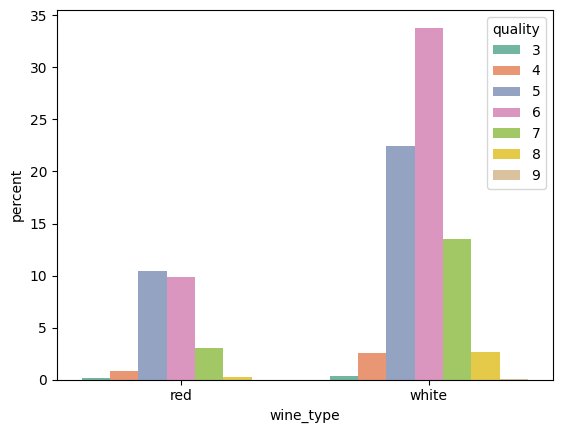

In [22]:
sns.countplot(x='wine_type', data=df_wine, hue="quality", stat="percent", palette='Set2');

**Observations:**
- The number of ratings for wine qualities '5' and '6' is more than 10 times greater than that for qualities '3', '4', '8', and '9'.
- If we leave this imbalance as it is, it might cause problems in predicting wine quality.
- Alternatively, we could undersample the categories '5' and '6' and oversample the remaining ones. 

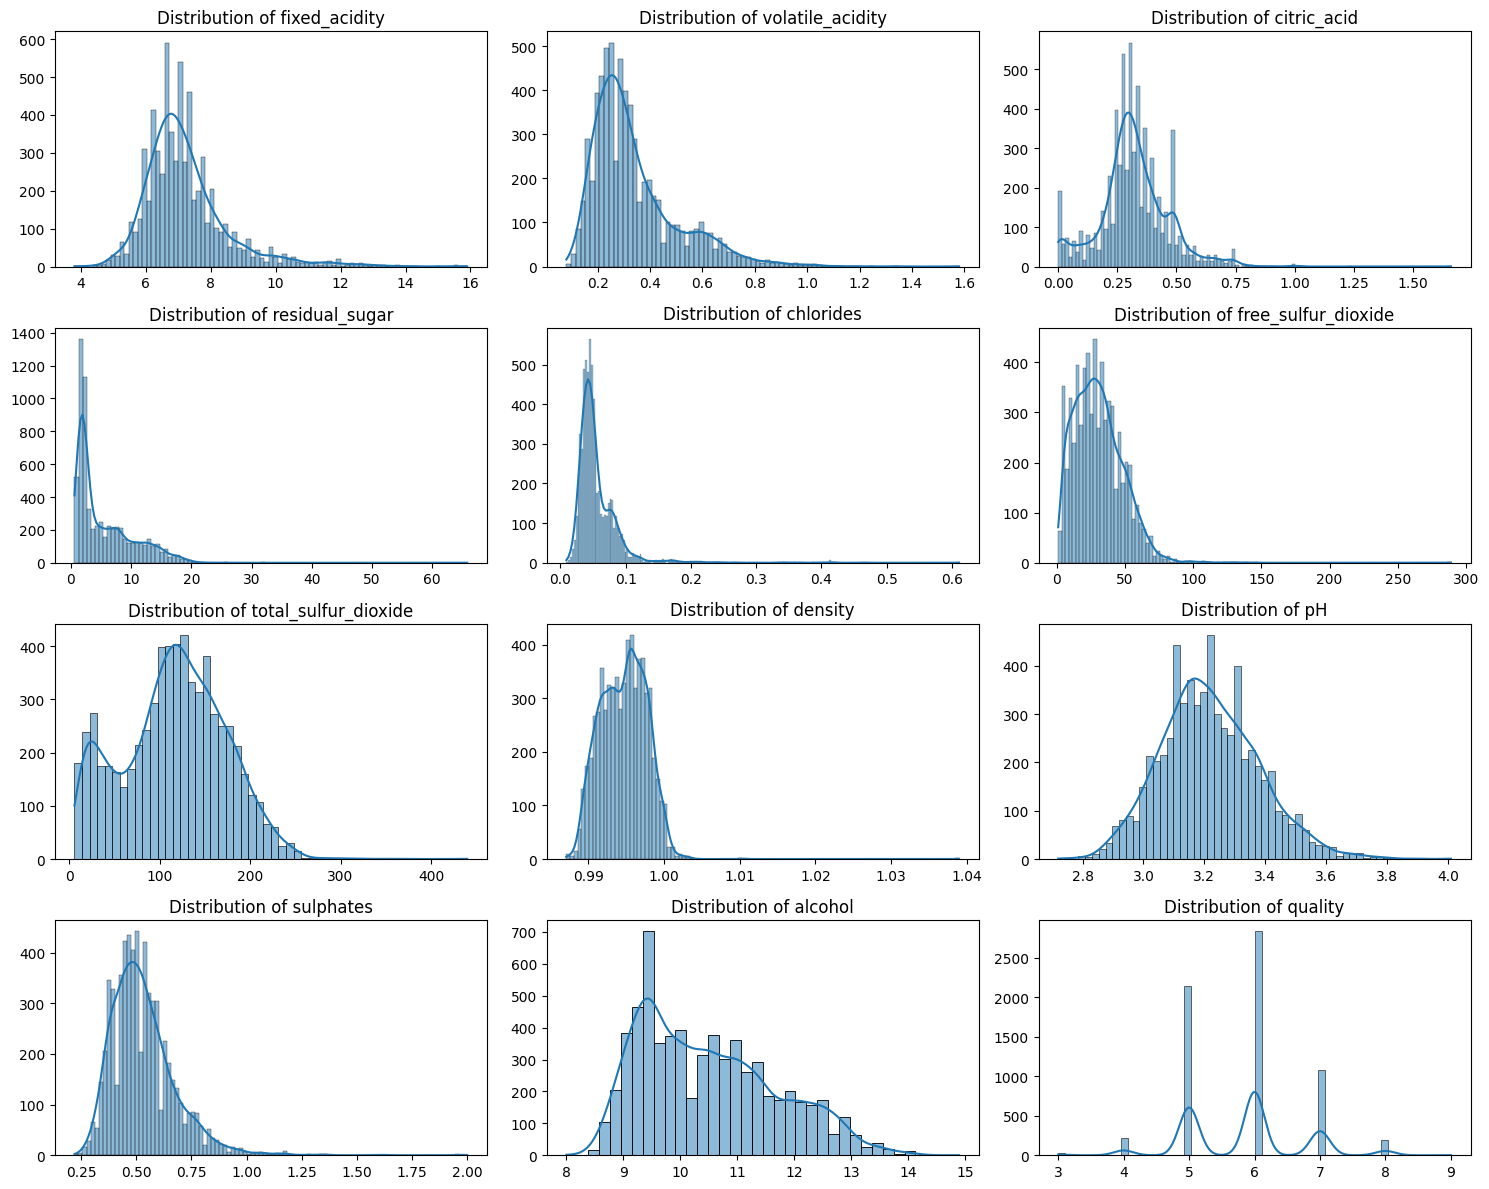

In [23]:
# Plotting
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, column in enumerate(df_wine.columns[:-1]):
    sns.histplot(df_wine[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

#### Let's see the Violin Plot

Reference : [https://www.labxchange.org/library/items/lb:LabXchange:46f64d7a:html:1](https://www.labxchange.org/library/items/lb:LabXchange:46f64d7a:html:1).

Similar to histograms, violin plots show the shape of a data set. However, unlike histograms, violin plots show the shape of a data set by using a Probability Density Function (PDF), or a density plot, which is effectively a smoothed-over histogram. The width of the PDF describes how frequently that value occurs in the data set. The wider regions of the density plot indicate values that occur more frequently.


<center>
    <img src="../images/violinplot.png" alt="title" width="800">
</center>

In a violin plot, the PDF is rotated and symmetrically oriented along the length of a boxplot, such that the width of the PDF describes how frequently that value occurs in the data set. A wider density function indicates that the value occurs more frequently. A narrower density function indicates that the value occurs less frequently.

<center>
    <img src="../images/violinplot2.png" alt="title" width="800">
</center>

- A violin plot combines the strengths of a boxplot with those of a histogram, and uses a smoothed probability density function (PDF) rather than a histogram to avoid the subjectivity of binning.
    - Violin plots include a boxplot, and identifies the minimum, first quartile, median, third quartile, and maximum in the same way that a boxplot does.
- Violin plots are a great way of visualizing multimodal data.
- Violin plots allow for quick graphical examination and comparison of one or more data sets.

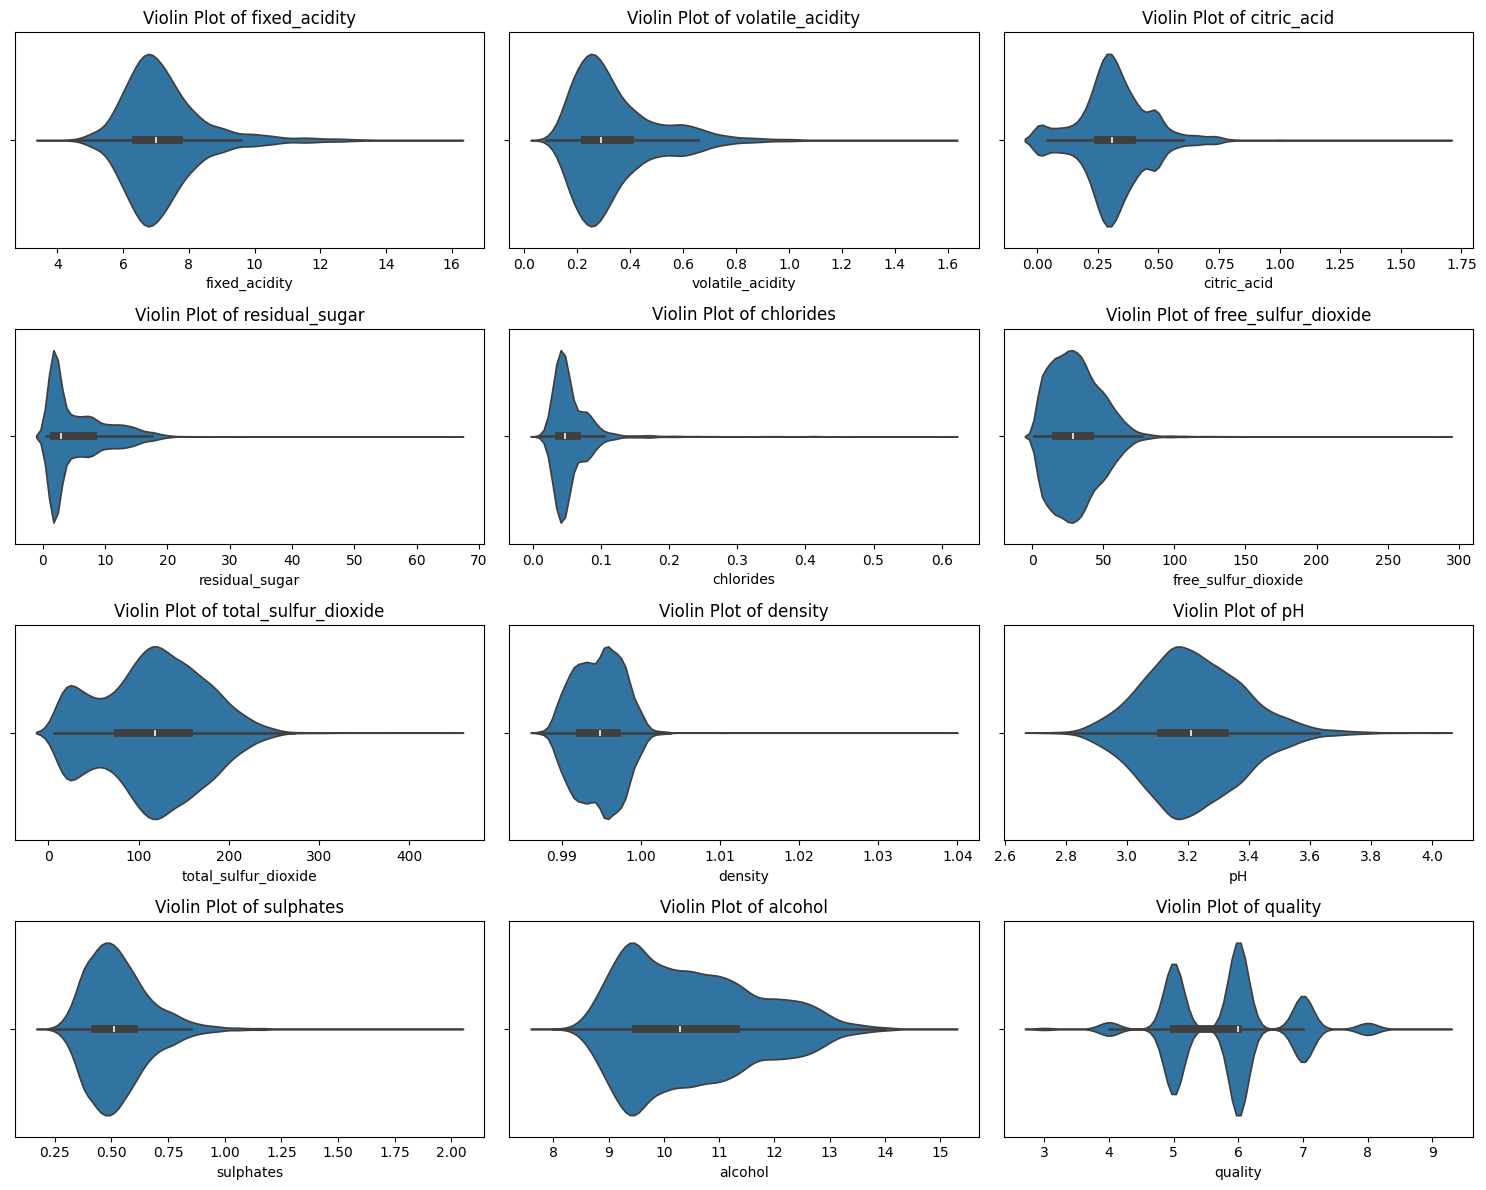

In [24]:
# Create a grid of subplots with 4 rows and 3 columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten the array of axes to make indexing easier

# Plot violin plots for each variable
for i, column in enumerate(df_wine.columns[:-1]):
    sns.violinplot(x=df_wine[column], ax=axes[i])
    axes[i].set_title(f'Violin Plot of {column}')

plt.tight_layout()
plt.show()

**Observations:**
- Some of our variables are approximately normally distributed but have a right skew. These variables include Fixed Acidity, Free Sulphur Dioxide, and Sulphates.
    - Therefore, we need to transform them.
    - Applying a **log**, cube root or square root transformation should help address this issue.
- The distributions of the remaining variables are not normal.
- Outliers are present in all variables. How to solve it?
    - Inter-Quartile Range (IQR) Method: Effective for detecting outliers in skewed distributions or non-normal data.
    - Percentile-Based Approach: Useful for identifying outliers in various types of distributions, including those not fitting normal or skewed patterns.

##### **Conclusion for Univariate Analysis**
- The dataset has more samples for wine qualities '5' and '6' than for '3', '4', '8', and '9'. To improve predictions, we should balance the number of samples for each quality.
- Some variables are nearly normal but have a right skew. We should use transformations like log, cube root, or square root to fix this.
- Outliers are present in all variables. 
    - To handle them, we can use the Interquartile Range (IQR) method or a percentile-based approach. 
        - This is particularly useful since the variables are not normally distributed.

### Bivariate Analysis

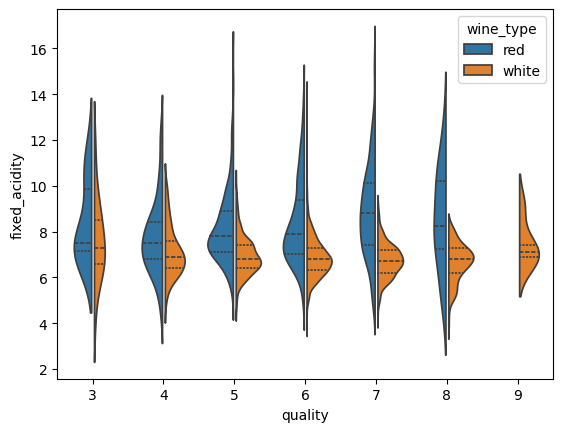

In [25]:
sns.violinplot(data=df_wine, x='quality', y='fixed_acidity', hue='wine_type', split=True, gap=.1, inner="quart");

**Observations:**
- Outliers are observed in red wine for the variable 'fixed_acidity' at some quality ratings: 5, 6, and 7.
- Red wine does not have a quality rating of 9.
- White wine does not exhibit extreme values.

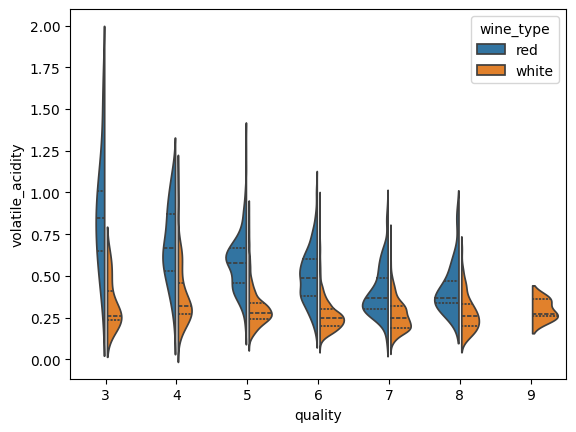

In [26]:
sns.violinplot(data=df_wine, x='quality', y='volatile_acidity', hue='wine_type', split=True, gap=.1, inner="quart");

**Observation:**
Outliers for the variable 'volatile_acidity' are observed in red and white wine across all quality ratings.

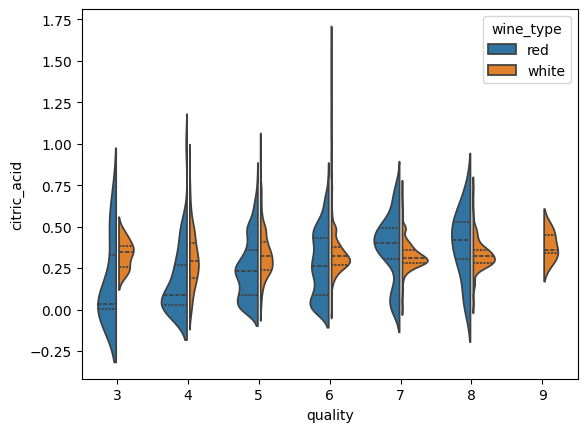

In [27]:
sns.violinplot(data=df_wine, x='quality', y='citric_acid', hue='wine_type', split=True, gap=.1, inner="quart");

**Observation:**
- Outliers for the variable 'citric_acid' are observed in red and white wine across almost all quality ratings.

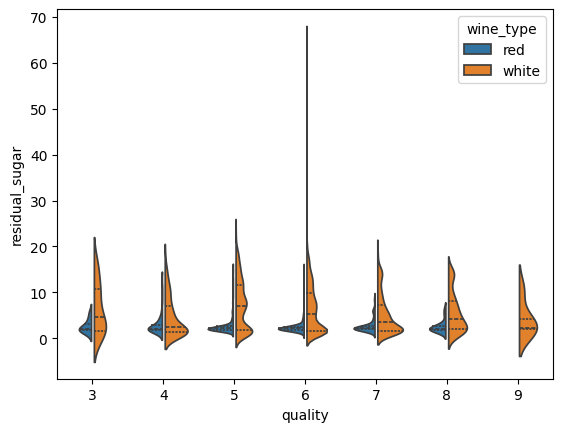

In [28]:
sns.violinplot(data=df_wine, x='quality', y='residual_sugar', hue='wine_type', split=True, gap=.1, inner="quart");

**Observation:**
Outliers for the variable 'residual_sugar' are observed more frequently in white wine than in red wine across more quality ratings.


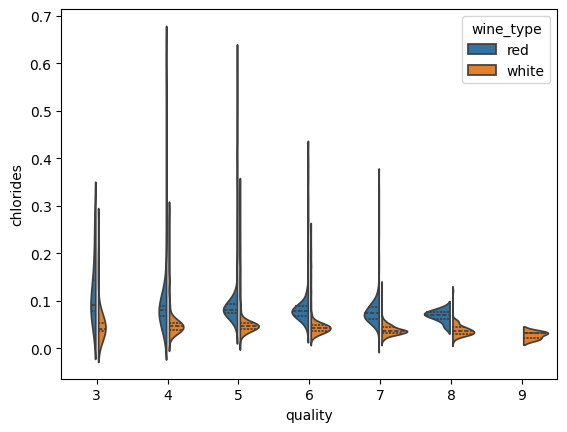

In [29]:
sns.violinplot(data=df_wine, x='quality', y='chlorides', hue='wine_type', split=True, gap=.1, inner="quart");

**Observation:**
Many Outliers for the variable 'chlorides' are observed in both red and white wine, with a higher frequency in red wine across almost all quality ratings.

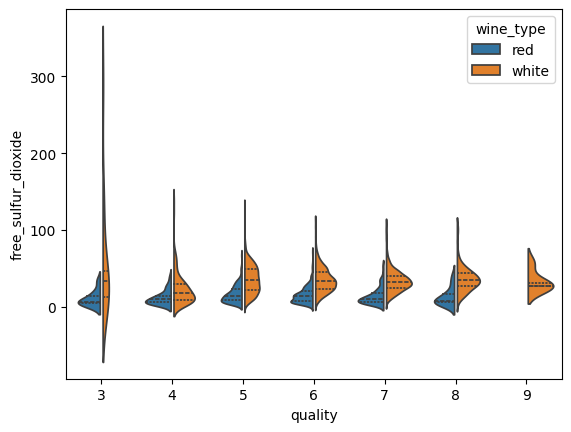

In [30]:
sns.violinplot(data=df_wine, x='quality', y='free_sulfur_dioxide', hue='wine_type', split=True, gap=.1, inner="quart");

**Observation:**
Outliers for the variable 'free_sulfur_dioxide' are observed more frequently in white wine than in red wine across almost all quality ratings.

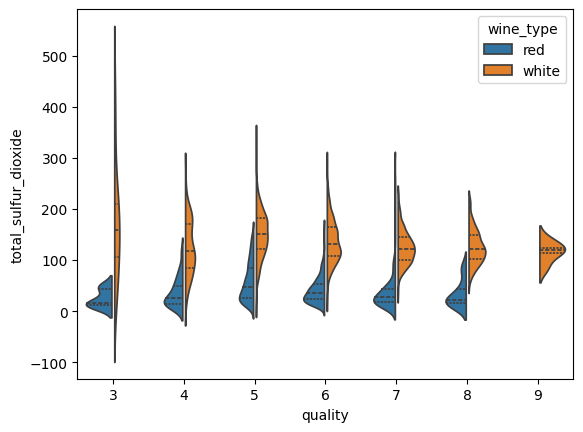

In [31]:
sns.violinplot(data=df_wine, x='quality', y='total_sulfur_dioxide', hue='wine_type', split=True, gap=.1, inner="quart");

**Observation:**
Outliers for the variable 'total_sulfur_dioxide' are observed more frequently in white wine than in red wine across almost all quality ratings.

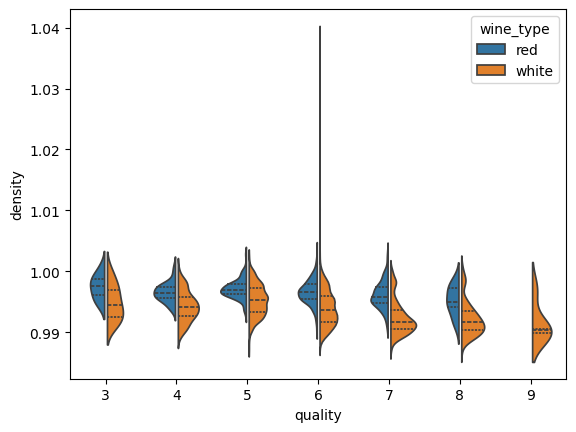

In [32]:
sns.violinplot(data=df_wine, x='quality', y='density', hue='wine_type', split=True, gap=.1, inner="quart");

**Observations:**
- Few outliers for the variable 'density' are observed in both red and white wine at quality ratings 5, 6, and 7.

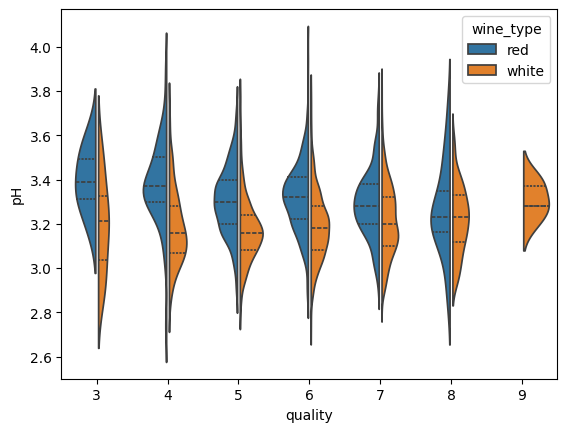

In [33]:
sns.violinplot(data=df_wine, x='quality', y='pH', hue='wine_type', split=True, gap=.1, inner="quart");

**Observation:**
Outliers for the variable 'pH' are observed more frequently in white wine than in red wine across almost all quality ratings.

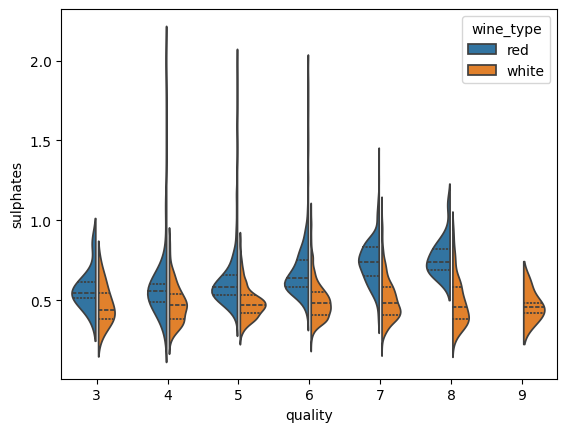

In [34]:
sns.violinplot(data=df_wine, x='quality', y='sulphates', hue='wine_type', split=True, gap=.1, inner="quart");

**Observation:**
Outliers for the variable 'sulphates' are observed more frequently in red wine than in white wine across almost all quality ratings.

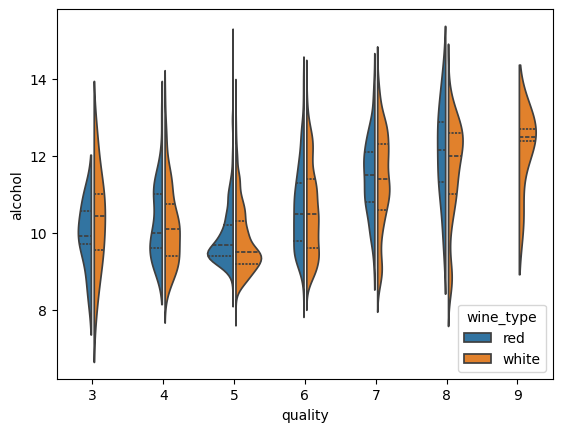

In [35]:
sns.violinplot(data=df_wine, x='quality', y='alcohol', hue='wine_type', split=True, gap=.1, inner="quart");

**Observation:**
Outliers for the variable 'alcohol' are observed in red wine and in white wine across all quality ratings.

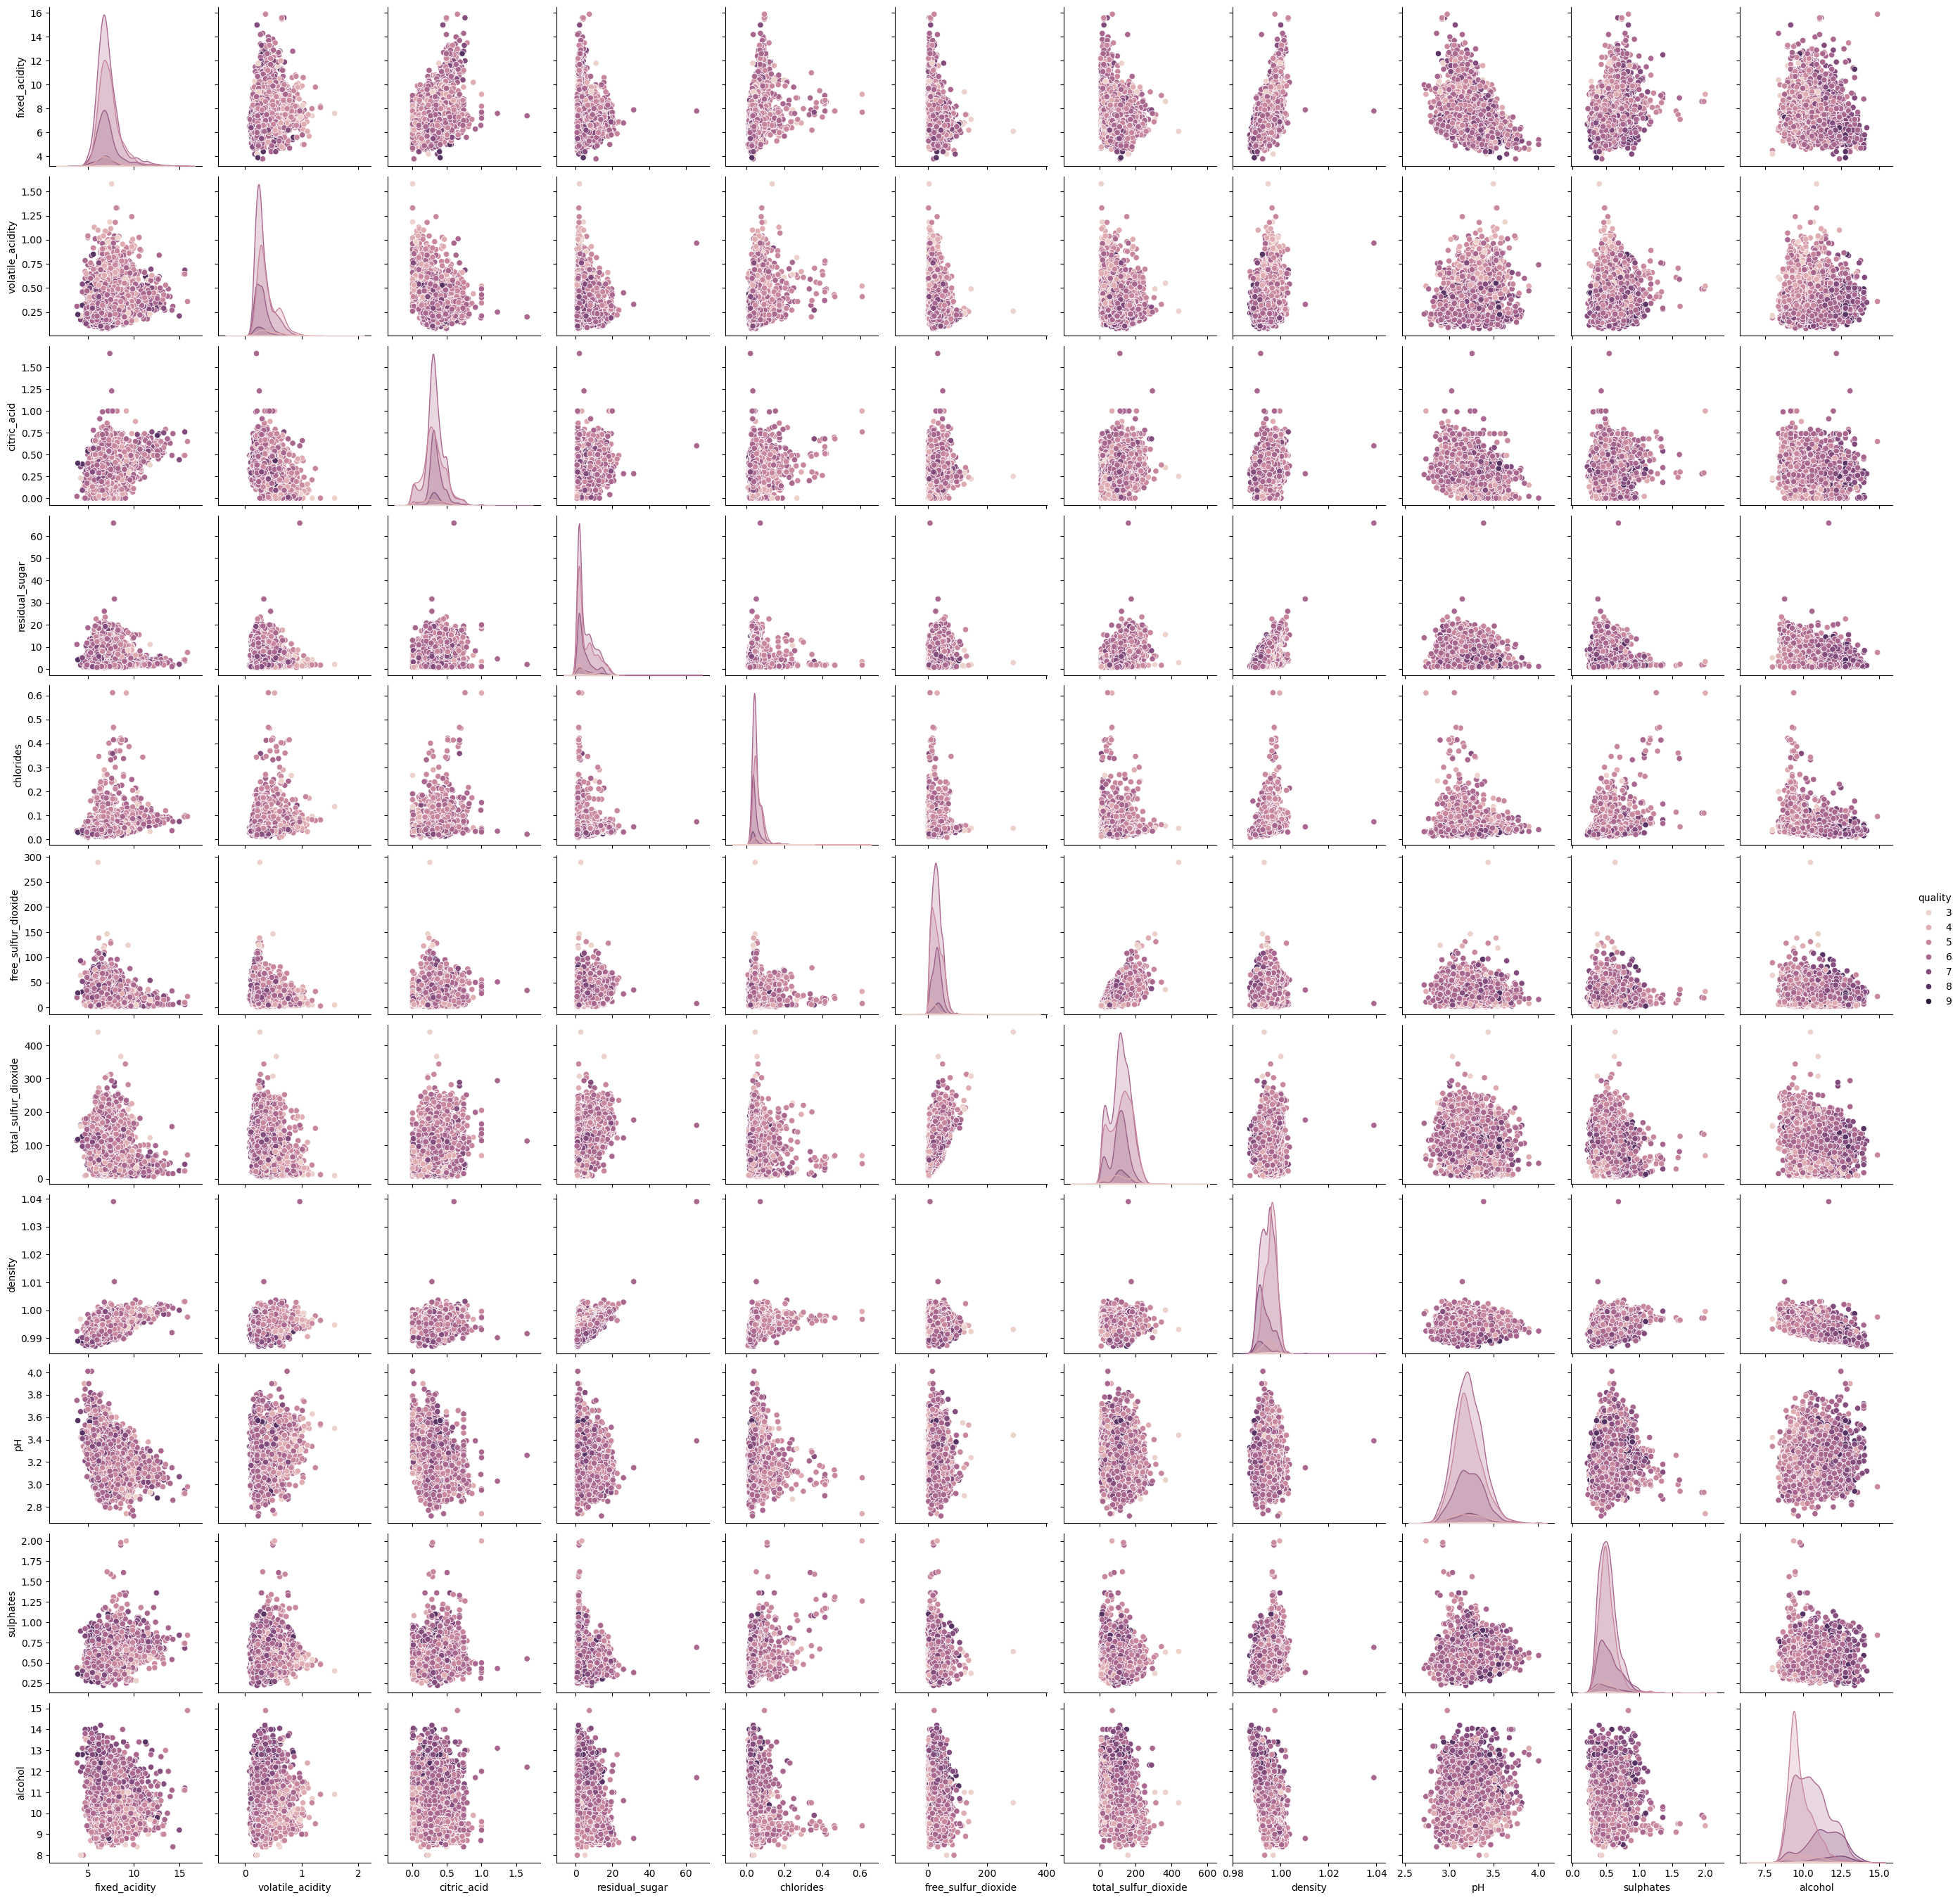

In [36]:
# Drop the last column in the dataset and get the pairplot
sns.pairplot(df_wine.iloc[:, :-1], hue = "quality");

**Observations:**
- We see that there is a correlation between some variables, which is undesirable. 
- This issue is known as 'multicollinearity.'

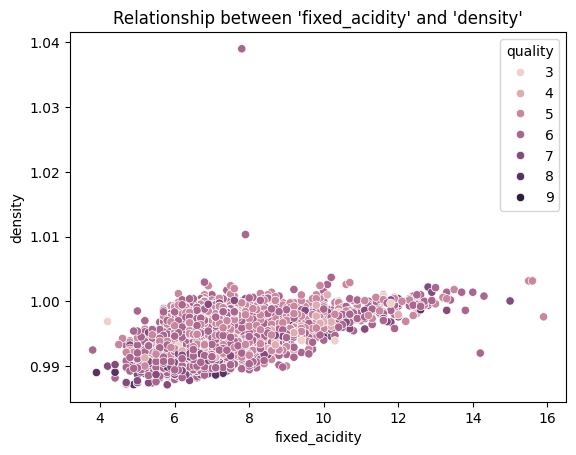

In [37]:
sns.scatterplot(x = "fixed_acidity",
                y = "density",
                hue = "quality",
                data = df_wine.iloc[:, :-1]).set(title = "Relationship between 'fixed_acidity' and 'density'");

**Observation:** It can be seen that there is a noticeable correlation between the 'fixed_acidity' and 'density' variables, though it is not perfectly linear.

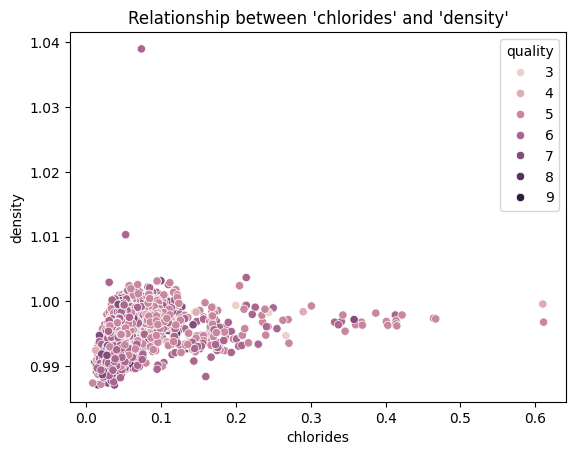

In [38]:
sns.scatterplot(x = "chlorides",
                y = "density",
                hue = "quality",
                data = df_wine.iloc[:, :-1]).set(title = "Relationship between 'chlorides' and 'density'");

**Observation:** It can be seen that there is no correlation between the 'fixed_acidity' and 'pH' variables.

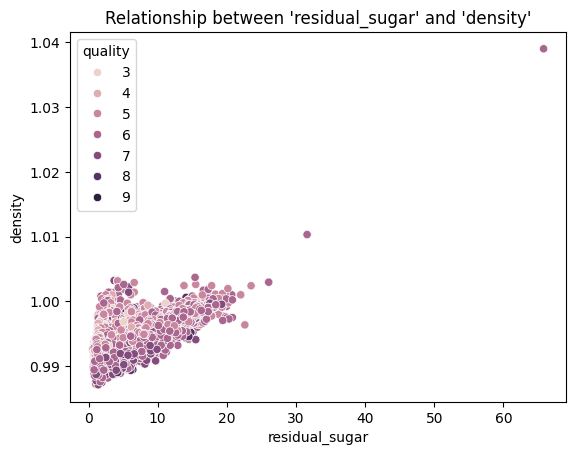

In [39]:
sns.scatterplot(x = "residual_sugar",
                y = "density",
                hue = "quality",
                data = df_wine.iloc[:, :-1]).set(title = "Relationship between 'residual_sugar' and 'density'");

**Observation:** It can be seen that there is a strong correlation between the 'residual_sugar' and 'density' variables.

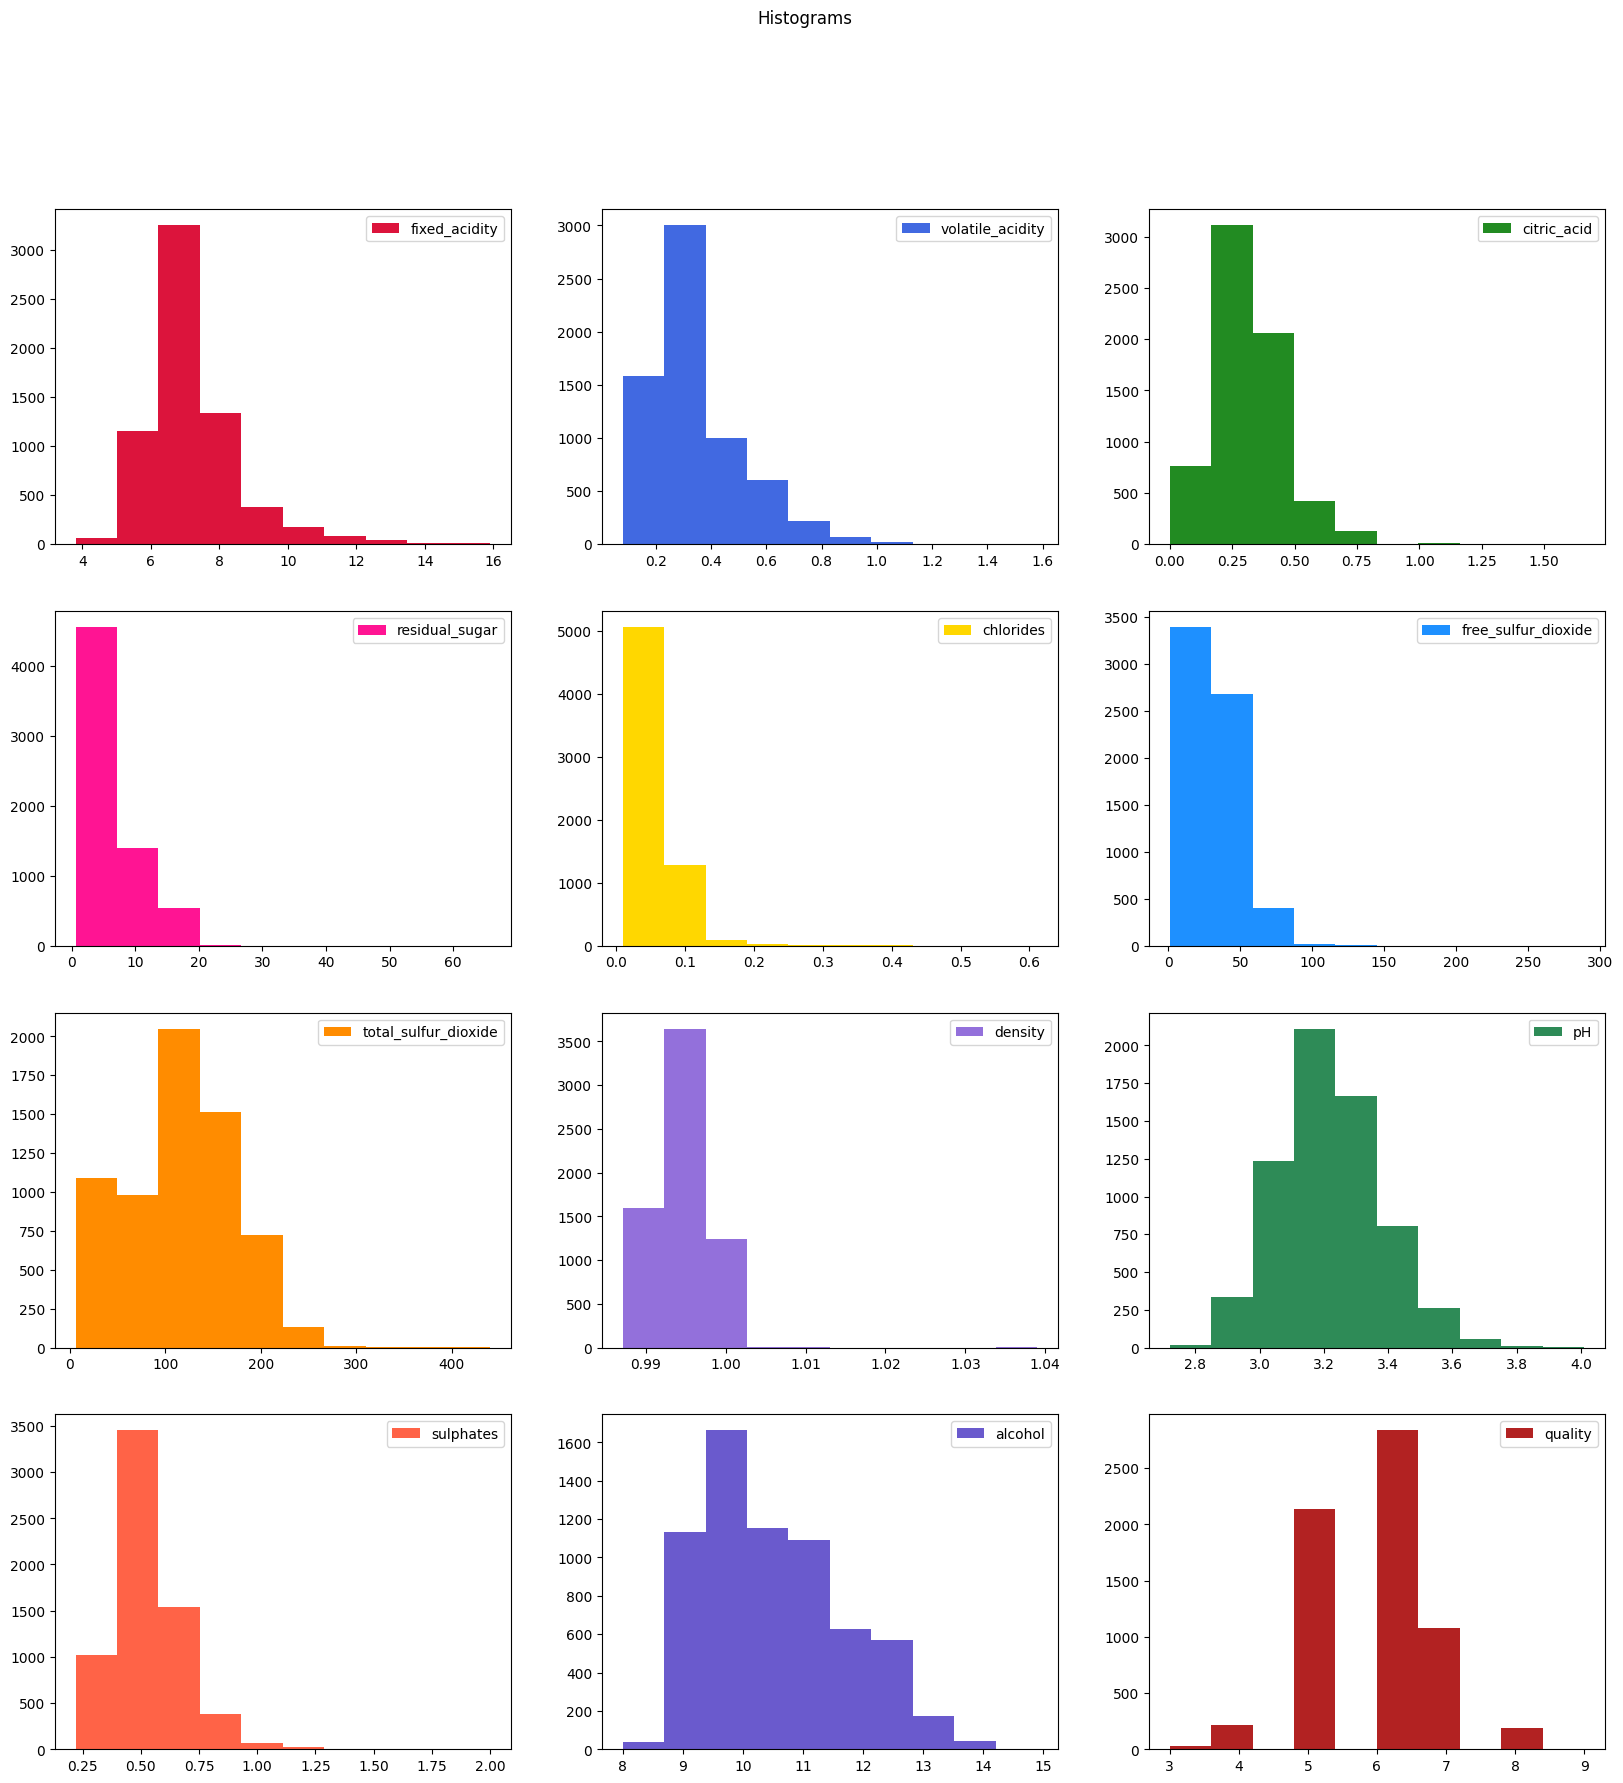

In [40]:
# Histogram plot analysis
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 20))

# Define colors
colors = ['#DC143C', '#4169E1', '#228B22', '#FF1493', '#FFD700', 
          '#1E90FF', '#FF8C00', '#9370DB', '#2E8B57', '#FF6347', 
          '#6A5ACD', '#B22222']

for index, column in enumerate(df_wine.columns[:-1]):
    ax = axes.flatten()[index]
    ax.hist(df_wine[column], color=colors[index], label = column)
    ax.legend(loc = "best")
plt.suptitle("Histograms")

plt.show()

**Observations:**
From the above histograms, we can observe that:
- The values of 'pH' and "density" variables are relatively normally distributed.
- Most of the values ​​of the "fixed_acidity" variable are in the range of 6 - 7;
- Most of the values ​​of the "volatile_acidity" variable are in the range of 0.25 - 0.4;
- Most values ​​of the "citric_acid" variable are in the range of 0.20 - 0.35;
- Most of the values ​​of the "residual_sugar" variable are in the range of 1 - 7.5;
- Most of the values ​​of the "chlorides" variable are in the range of 1 - 7.5;
- Most values ​​of the "free_sulfur_dioxide" variable are in the range 1 - 40;
- Most values ​​of the "total_sulfur_dioxide" variable are in the range 100 - 140;
- Most of the values ​​of the "density" variable are in the range of 0.994 - 0.998;
- Most of the values ​​of the "pH" variable are in the range of 3.15 - 3.28;
- Most of the values ​​of the "sulphates" variable are in the range of 0.40 - 0.55;
- Most of the values ​​of the "alcohol" variable are in the range of 9.5 - 10.2;
- Most values ​​of the "quality" variable are 6 and 6.7.

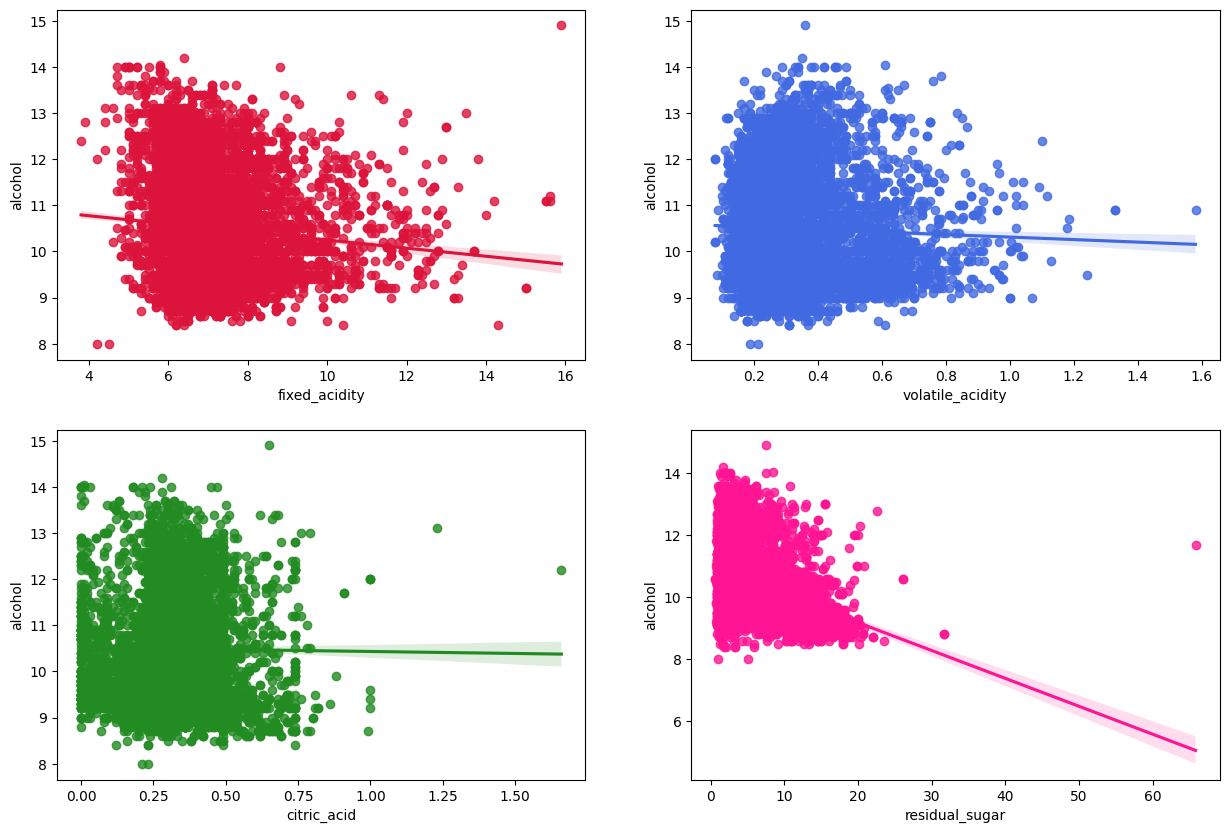

In [41]:
# Regression Plot
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
axes = axes.flatten()
# Define colors
colors = ['#DC143C', '#4169E1', '#228B22', '#FF1493', '#FFD700', 
          '#1E90FF', '#FF8C00', '#9370DB', '#2E8B57', '#FF6347', 
          '#6A5ACD', '#B22222']
# Plot regression lines
sns.regplot(ax = axes[0], x = "fixed_acidity", y = "alcohol", data = df_wine, color = colors[0]);
sns.regplot(ax = axes[1], x = "volatile_acidity", y = "alcohol", data = df_wine, color = colors[1]);
sns.regplot(ax = axes[2], x = "citric_acid", y = "alcohol", data = df_wine, color = colors[2]);
sns.regplot(ax = axes[3], x = "residual_sugar", y = "alcohol", data = df_wine, color = colors[3]);

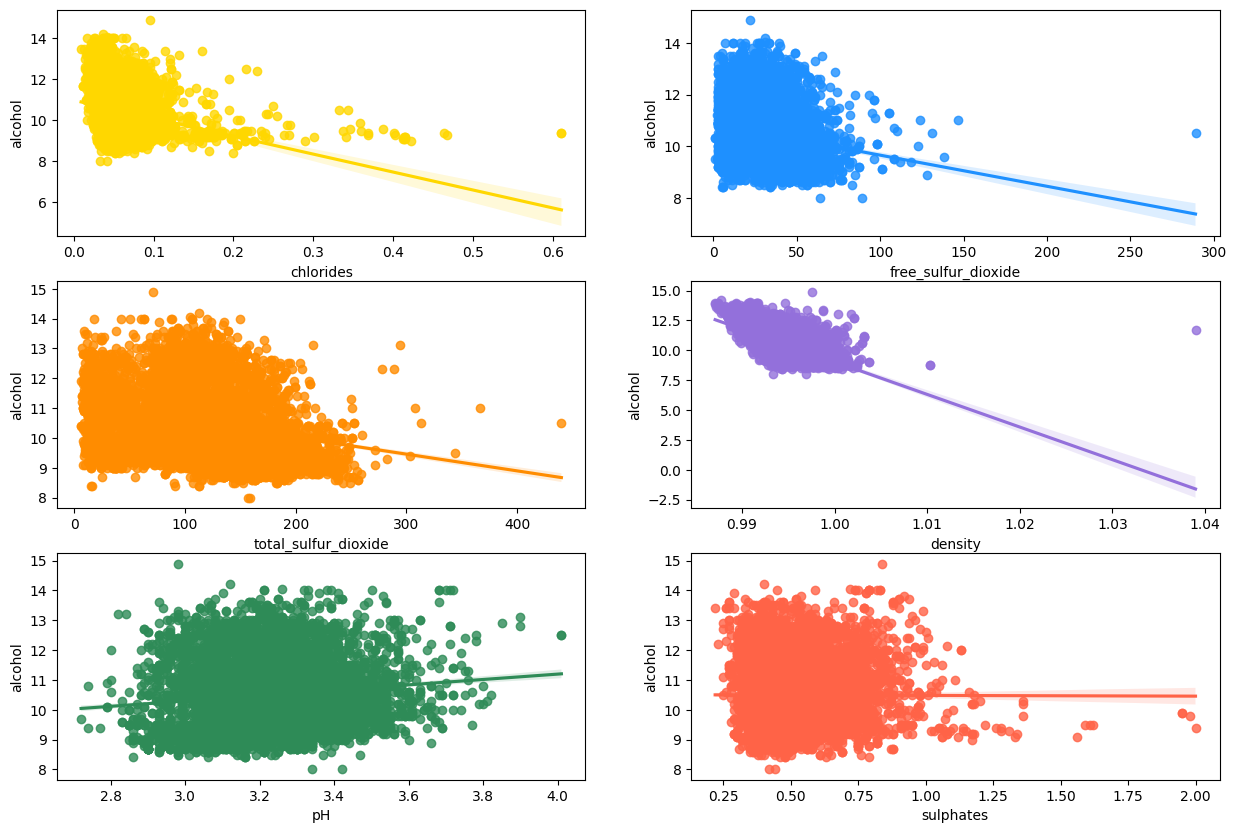

In [42]:
# Regression Plot
fig, axes = plt.subplots(3, 2, figsize = (15, 10))
axes = axes.flatten()
# Define colors
colors = ['#DC143C', '#4169E1', '#228B22', '#FF1493', '#FFD700', 
          '#1E90FF', '#FF8C00', '#9370DB', '#2E8B57', '#FF6347', 
          '#6A5ACD', '#B22222']
# Plot regression lines
sns.regplot(ax = axes[0], x = "chlorides", y = "alcohol", data = df_wine, color = colors[4]);
sns.regplot(ax = axes[1], x = "free_sulfur_dioxide", y = "alcohol", data = df_wine, color = colors[5]);
sns.regplot(ax = axes[2], x = "total_sulfur_dioxide", y = "alcohol", data = df_wine, color = colors[6]);
sns.regplot(ax = axes[3], x = "density", y = "alcohol", data = df_wine, color = colors[7]);
sns.regplot(ax = axes[4], x = "pH", y = "alcohol", data = df_wine, color = colors[8]);
sns.regplot(ax = axes[5], x = "sulphates", y = "alcohol", data = df_wine, color = colors[9]);

**Observation:** Negative linear relationships between 'alcohol' and several other variables are observed.

##### **Conclusion for Bivariate Analysis**
- All the variables contain a lot of outliers for both red wine and white wine across almost all quality ratings.
- Red wine does not have a quality rating of 9.
- Some variables exhibit strong linear relationships, some show weak linear relationships, and the majority display negative linear relationships.

### Mutlivariate Analysis

### Correlation and causation

Reference: [https://www.abs.gov.au/statistics/understanding-statistics/statistical-terms-and-concepts/correlation-and-causation](https://www.abs.gov.au/statistics/understanding-statistics/statistical-terms-and-concepts/correlation-and-causation).

#### The difference between correlation and causation
Two or more variables considered to be related, in a statistical context, if their values change so that as the value of one variable increases or decreases so does the value of the other variable (although it may be in the opposite direction).

For example, for the two variables "hours worked" and "income earned" there is a relationship between the two if the increase in hours worked is associated with an increase in income earned. If we consider the two variables "price" and "purchasing power", as the price of goods increases a person's ability to buy these goods decreases (assuming a constant income).

Correlation is a statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables. A correlation between variables, however, does not automatically mean that the change in one variable is the cause of the change in the values of the other variable.

Causation indicates that one event is the result of the occurrence of the other event; i.e. there is a causal relationship between the two events. This is also referred to as cause and effect.

Theoretically, the difference between the two types of relationships are easy to identify — an action or occurrence can cause another (e.g. smoking causes an increase in the risk of developing lung cancer), or it can correlate with another (e.g. smoking is correlated with alcoholism, but it does not cause alcoholism). In practice, however, it remains difficult to clearly establish cause and effect, compared with establishing correlation.

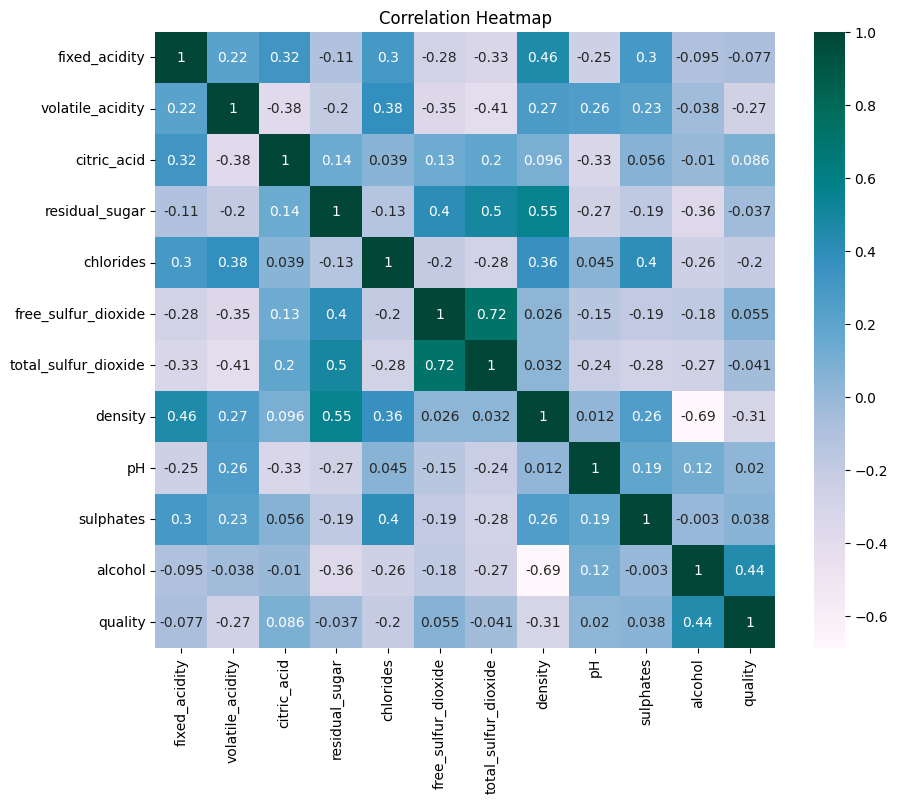

In [43]:
plt.figure(figsize = (10,8))
# Drop the last column in the dataset and plot the correlation matrix
sns.heatmap(df_wine.iloc[:, :-1].corr(),annot=True, cmap= 'PuBuGn')
plt.title('Correlation Heatmap');

**Observations:**
There is a problem of multicollinearity.

- We observe a moderate positive correlation between the variables 'free_sulfur_dioxide' and 'total_sulfur_dioxide,' as well as between 'residual_sugar' and 'density'.
- We also observe a moderate negative correlation between the variables 'density' and 'alcohol.

#### Pearson Correlation Coefficient

The p-value, or probability value tests the null hypothesis that there is no correlation (i.e., the correlation coefficient is zero).

The p-value, or probability value tells you if your results are probably just random or if they might be something real. A small p-value means your results are less likely to be random.

The level of statistical significance is often expressed as a p-value between 0 and 1. The threshold is typically 0.05, or 0.01, or even 0.001.

The smaller the p-value, the less likely the results occurred by random chance, and the stronger the evidence that you should reject the null hypothesis.

- A p-value less than or equal to your significance level (typically p <= 0.05) is statistically significant, meaning the observed data provide strong evidence against the null hypothesis.
    - This suggests the effect under study likely represents a real relationship rather than just random chance.
    - It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random).
    - Therefore, we reject the null hypothesis and accept the alternative hypothesis
- A p-value more than the significance level (typically p > 0.05) is not statistically significant and indicates strong evidence for the null hypothesis.
    - This means we retain the null hypothesis and reject the alternative hypothesis. 
    - You should note that you cannot accept the null hypothesis; we can only reject it or fail to reject it.

In [44]:
import scipy.stats as st

# Function to calculate Pearson correlation coefficient and p-value
def get_correlation(column1, column2, data):
    pearson_corr_coef, p_value = st.pearsonr(data[column1], data[column2])
    print(f"Correlation between {column1} and {column2} : {pearson_corr_coef:.4f}")
    print(f"P-value of this correlation : {p_value:.4f}")

In [45]:
get_correlation('alcohol','density', df_wine)

Correlation between alcohol and density : -0.6867
P-value of this correlation : 0.0000


**Observations:**
- A Pearson correlation coefficient of -0.6867 means there is a moderate to strong negative relationship between the 'alcohol' and 'density' variables. 
    - As one variable increases, the other tends to decrease.
- A p-value of 0.0 indicates that the correlation is statistically significant.
    - This means it is extremely unlikely that this result happened by chance.
    - **In other words, the negative relationship between 'alcohol' and 'density' is very likely to be real.**

In [46]:
get_correlation('free_sulfur_dioxide','total_sulfur_dioxide', df_wine)

Correlation between free_sulfur_dioxide and total_sulfur_dioxide : 0.7209
P-value of this correlation : 0.0000


**Observations:**
- A Pearson correlation coefficient of 0.7209 means there is a moderate to strong positive relationship between the 'free_sulfur_dioxide' and 'total_sulfur_dioxide' variables. 
    - In other words, as one variable increases, the other also tends to increase.
- A p-value of $0.0<0.05$ indicates that the correlation is statistically significant.
    - **This implies that the observed correlation is very unlikely to have occurred by random chance, making it highly likely that the correlation is real.**

In [47]:
get_correlation('fixed_acidity','density', df_wine)

Correlation between fixed_acidity and density : 0.4589
P-value of this correlation : 0.0000


**Observations:**
- Pearson Correlation Coefficient: 0.4589 (indicating a moderate positive relationship between 'fixed_acidity' and 'density' variables).
- P-value: $0.0<0.05$ (indicating the relationship is statistically significant).

In [48]:
get_correlation('citric_acid','pH', df_wine)

Correlation between citric_acid and pH : -0.3298
P-value of this correlation : 0.0000


**Observations:**
- Pearson Correlation Coefficient: -0.3298 (indicating a moderate negative relationship between 'citric_acid' and 'pH' variables).
- P-value: $1.1568\times 10^{-164}<0.05$ (indicating the relationship is statistically significant).

In [49]:
get_correlation('alcohol','residual_sugar', df_wine)

Correlation between alcohol and residual_sugar : -0.3594
P-value of this correlation : 0.0000


**Observations:**
- Correlation Coefficient: The correlation between 'alcohol' and 'residual_sugar' is -0.3594. This means there is a moderate negative relationship: as alcohol levels go up, residual sugar levels tend to go down.
- P-value: $2.28 \times 10^{-197}<0.05$, showing that this correlation is statistically significant. This means the relationship between 'alcohol' and 'residual_sugar' is likely real.

In [50]:
get_correlation('quality','sulphates', df_wine)

Correlation between quality and sulphates : 0.0385
P-value of this correlation : 0.0019


**Observations:**
- Pearson Correlation Coefficient: 0.0384 (indicating a moderate positive relationship between 'quality' and 'sulphates' variables).
- P-value: $0.0019 < 0.05$ (indicating the relationship is statistically significant).

In [51]:
get_correlation('chlorides','volatile_acidity', df_wine)

Correlation between chlorides and volatile_acidity : 0.3771
P-value of this correlation : 0.0000


**Observations:**
- Pearson Correlation Coefficient: 0.3771 (indicating a moderate positive relationship between 'chlorides' and 'volatile_acidity' variables).
- P-value: $1.1286\times10^{-128}<0.05$ (indicating the relationship is statistically significant)

In [52]:
get_correlation('alcohol','fixed_acidity', df_wine)

Correlation between alcohol and fixed_acidity : -0.0955
P-value of this correlation : 0.0000


**Observations:**
- Pearson Correlation Coefficient: -0.0954 (indicating a moderate negative relationship between 'alcohol' and 'fixed_acidity' variables).
- P-value: $1.2591\times10^{-14}<0.05$ (indicating the relationship is statistically significant)

#### Display non-Significant Relationships

In [53]:
import itertools

# Function to display non-significant relationships and their p-values
def display_non_significant_statistic(data, threshold=0.05):
    # Get a list of all column names, excluding the last column
    columns = data.columns[:-1]
    
    # Iterate over all unique pairs of columns
    for column1, column2 in itertools.combinations(columns, 2):
        try:
            # Get correlation and p-value
            result = st.pearsonr(data[column1], data[column2])
            
            if result is not None:
                correlation, p_value = result
                
                # Check if the p-value is greater than the threshold
                if p_value > threshold:
                    # Display the results for non-significant correlations
                    print(f"Correlation between '{column1}' and '{column2}': {correlation:.4f}")
                    print(f"P-value: {p_value}")
                    print(f"Relationship between '{column1}' and '{column2}' is statistically non-significant ({p_value:.4f}  > {threshold}).")
                    print("------" * 16)  # Print a line for better readability
        
        except Exception as e:
            print(f"Error calculating correlation for {column1} and {column2}: {e}")

In [54]:
# Display non-significant relationships and their p-values
display_non_significant_statistic(df_wine, threshold=0.05)

Correlation between 'citric_acid' and 'alcohol': -0.0105
P-value: 0.3977325867766533
Relationship between 'citric_acid' and 'alcohol' is statistically non-significant (0.3977  > 0.05).
------------------------------------------------------------------------------------------------
Correlation between 'density' and 'pH': 0.0117
P-value: 0.34629739490457173
Relationship between 'density' and 'pH' is statistically non-significant (0.3463  > 0.05).
------------------------------------------------------------------------------------------------
Correlation between 'pH' and 'quality': 0.0195
P-value: 0.11593102710210626
Relationship between 'pH' and 'quality' is statistically non-significant (0.1159  > 0.05).
------------------------------------------------------------------------------------------------
Correlation between 'sulphates' and 'alcohol': -0.0030
P-value: 0.8071388761459946
Relationship between 'sulphates' and 'alcohol' is statistically non-significant (0.8071  > 0.05).
---------


##### **Conclusion for Mutlivariate Analysis**

- Moderate positive correlations:
    - When free sulfur dioxide increases, total sulfur dioxide also tends to increase, indicating a positive relationship between these variables.
    - Higher residual sugar is associated with higher density in the wine.
- Moderate negative correlation:
    - As the density of the wine increases, the alcohol content tends to decrease.
- Non-significant relationships:
    - Several pairs of variables are statistically non-significant, meaning that the observed correlations are not strong enough to conclude that they are real effects rather than occurring by random chance.
    - These non-significant pairs are: 'citric_acid' and 'alcohol', 'density' and 'pH', 'pH' and 'quality', and 'sulphates' and 'alcohol'.
- Significant relationships:
    - Most pairs of variables in the dataset have statistically significant relationships. 
    - This suggests that the observed relationships between these variables are likely real and not due to random chance.

# Data Preprocessing

### Handling Categorical Feature

In [146]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the categorical feature
encoded_features = encoder.fit_transform(df_wine[['wine_type']])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['wine_type']))

# Combine with the original DataFrame (excluding the original categorical column)
df_wine = df_wine.drop(columns=['wine_type']).join(encoded_df)

In [147]:
df_wine.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  wine_type_white  
0      9.4        5              0.0  
1      9.8        5              0.0  
2      9.8        5              0.0  
3      9.8        6              0.0  
4      9.4        5              0.0

In [148]:
# Compute the correlation matrix
correlation_matrix = df_wine.corr()

# Extract the correlation of all variables with 'quality'
quality_correlation = correlation_matrix['quality']

# Sort the correlations in descending order
sorted_quality_correlation = quality_correlation.sort_values(ascending=False)

# Extract the variable with the highest correlation
# Note: 'quality' itself will always be the highest, so we exclude it.
highest_correlation_variable = sorted_quality_correlation.index[1]
highest_correlation_value = sorted_quality_correlation[1]

print(f"The variable with the highest correlation to 'quality' is '{highest_correlation_variable}' with a correlation value of {highest_correlation_value:.2f}.")


The variable with the highest correlation to 'quality' is 'alcohol' with a correlation value of 0.44.


In [58]:
df_wine.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
wine_type               0.119323
citric_acid             0.085532
free_sulfur_dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual_sugar         -0.036980
total_sulfur_dioxide   -0.041385
fixed_acidity          -0.076743
chlorides              -0.200666
volatile_acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

**Observations:**
- None of the columns show a high correlation with the target variable.
- However, 'alcohol' and 'density' have moderate correlations with 'quality'.

### Feature Engineering

In this dataset, the quality of wine ranges from 3 to 9.

To balance the number of samples for each quality level, we will categorize the quality into two groups:
- High quality wine : 6 to 9.
- Low quality wine : 3 to 5.

In [59]:
df_wine["quality"] = np.where(df_wine["quality"] > 5, 1, 0)
df_wine["quality"]

0       0
1       0
2       0
3       1
4       0
       ..
6492    1
6493    0
6494    1
6495    1
6496    1
Name: quality, Length: 6497, dtype: int64

In [60]:
df_wine.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  wine_type  
0      9.4        0          0  
1      9.8        0          0  
2      9.8        0          0  
3      9.8        1          0  
4      9.4        0          0

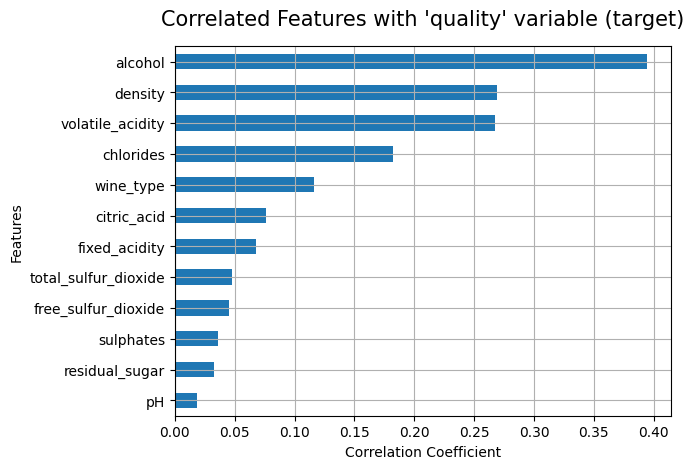

In [61]:
# Calculating the correlation matrix
correlation_matrix = df_wine.corr()

# Getting the correlations of features with respect to the target variable 'quality'
quality_correlation = correlation_matrix['quality'].apply(lambda x: abs(x)).sort_values(ascending=False)

# Plotting the top 10 highly correlated features with 'quality'
top_10_features = quality_correlation[1:][::-1]  # Excluding 'quality' itself
# plt.figure(figsize=(15, 15))
top_10_features.plot(kind='barh')
plt.title("Correlated Features with 'quality' variable (target)", size=15, pad=15)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(True);

**Observations:** 
- Since almost all variables are correlated with the target variable, but none show a moderate or strong correlation, we should consider all the variables for the model. 
- We don't need to search for additional feature importance.

### Split Data into Dependent and Independent Variables

In [62]:
# Prepare features and target variable
X = df_wine.drop(['quality'], axis=1)  # Drop 'quality'
y = df_wine['quality']  # Target variable is 'quality'

### Split Data into Train and Test Sets

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 5)

### Handling Outliers

In [65]:
# # Function to remove outliers based on IQR
# def remove_outliers_iqr(data):
#     Q1 = data.quantile(0.25)
#     Q3 = data.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [66]:
# # Apply the outlier removal function only to the training data
# x_train_cleaned = remove_outliers_iqr(x_train)

# # Ensure that the corresponding target labels are aligned
# y_train_cleaned = y_train.loc[x_train_cleaned.index]

### Data Transformation

Since the observed relationships between most pairs of variables are likely real, we want to reduce the impact of outliers by scaling the data.
- We won't use StandardScaler because it assumes a normal distribution of the data, and our data isn't normally distributed.
- Instead, we'll use MinMaxScaler to normalize the data within a specific range, or RobustScaler, which is more resilient to outliers.

In [67]:
# Data normalization

# mmax_scaler = MinMaxScaler()
# mmax_scaler.fit(x_train_cleaned)
# x_train_scaled = mmax_scaler.transform(x_train_cleaned)
# x_test_scaled = mmax_scaler.transform(x_test)

robust_scaler = RobustScaler()
robust_scaler.fit(x_train)
x_train_scaled = robust_scaler.transform(x_train)
x_test_scaled = robust_scaler.transform(x_test)

In [68]:
print(f"Shape of training independent variables: {x_train_scaled.shape}")
print(f"Shape of training dependent variables: {y_train.shape}")
print('-----' * 10)
print(f"Shape of test independent variables: {x_test_scaled.shape}")
print(f"Shape of test dependent variables: {y_test.shape}")

Shape of training independent variables: (5197, 12)
Shape of training dependent variables: (5197,)
--------------------------------------------------
Shape of test independent variables: (1300, 12)
Shape of test dependent variables: (1300,)


# Data Modeling

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier # type: ignore

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [70]:
# Function to plot the confusion matrix
def plot_confusion_matrix(cm, cmap=plt.cm.Blues, figsize=(4, 3)):
    
    plt.figure(figsize=figsize)  # Set the figure size

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion matrix")
    plt.colorbar()

    # Use numerical indices for tick marks
    tick_marks = np.arange(cm.shape[0])
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)

    # Display the matrix values
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [71]:
# Function to plot the ROC - AUC 
def plot_roc_curve(fpr, tpr, roc_auc, model_name, figsize=(6, 4.5)):
    """
    This function plots the ROC curve and displays the AUC for a given model.
    
    Parameters:
    - fpr: Array of false positive rates
    - tpr: Array of true positive rates
    - roc_auc: AUC score of the ROC curve
    - model_name: Name of the model (used for the legend)
    - figsize: Tuple specifying the figure size (width, height)
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:0.3f})')
    ax.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random predictions
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC - AUC")
    ax.grid()
    ax.legend()
    fig.tight_layout();

### Logistic Regression Model

In [72]:
# Initialize the model
lr = LogisticRegression()

In [73]:
# Searching for the best hyperparameters using the GridSearchCV method

lr_params = {
    "penalty": ["l1", "l2", "elasticnet", None],  # Type of regularization
    "C": [0.01, 0.05, 0.1, 0.8, 1.],  # Regularization strength
    "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"] # Optimization algorithm 
}


# Set up GridSearchCV
lr_cv_model = GridSearchCV(lr, lr_params, cv=10)
# Fit GridSearchCV
lr_cv_model.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.8, 1.0],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [74]:
# Get Best Parameters of LR Model
print("Best score for train set: " + str(lr_cv_model.best_score_))

print('-----' * 10)

print("Best penalty value: " + str(lr_cv_model.best_params_["penalty"]),
     "\nBest C: " + str(lr_cv_model.best_params_["C"]),
     "\nBest solver: " + str(lr_cv_model.best_params_["solver"]))

Best score for train set: 0.7398480806284274
--------------------------------------------------
Best penalty value: l1 
Best C: 0.1 
Best solver: liblinear


In [75]:
# Fit LR with Best Parameters
lr_model = LogisticRegression(
    penalty = lr_cv_model.best_params_["penalty"],
    C = lr_cv_model.best_params_["C"],
    solver = lr_cv_model.best_params_["solver"],
    random_state = 5)

lr_model.fit(x_train_scaled, y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=5, solver='liblinear')

#### Model Evaluation

In [76]:
# Model Evaluation
y_pred_lr = lr_model.predict(x_test_scaled)
print(f'Accuracy score on the test set : {accuracy_score(y_test, y_pred_lr)}')

Accuracy score on the test set : 0.7415384615384616


              precision    recall  f1-score   support

           0       0.72      0.54      0.62       502
           1       0.75      0.87      0.81       798

    accuracy                           0.74      1300
   macro avg       0.74      0.70      0.71      1300
weighted avg       0.74      0.74      0.73      1300



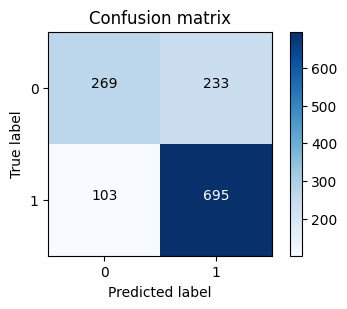

In [77]:
# Classification Report of KNN Model
print(classification_report(y_test, y_pred_lr))

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_lr))

#### Plot the ROC Curve and AUC

The Receiver Operator Characteristic (ROC) curve evaluates the performance of a binary classifier by plotting the True Positive Rate (Sensitivity) against the False Positive Rate at various thresholds. It shows how well the model distinguishes between positive and negative classes.

The AUC (Area Under the Curve) measures the overall effectiveness of the classifier:
- AUC = 1: Perfect distinction between classes.
- 0.5 < AUC < 1: Good performance at distinguishing between positive and negative classes.
- AUC = 0.5: The model performs no better than random guessing.

A higher AUC indicates better model performance.

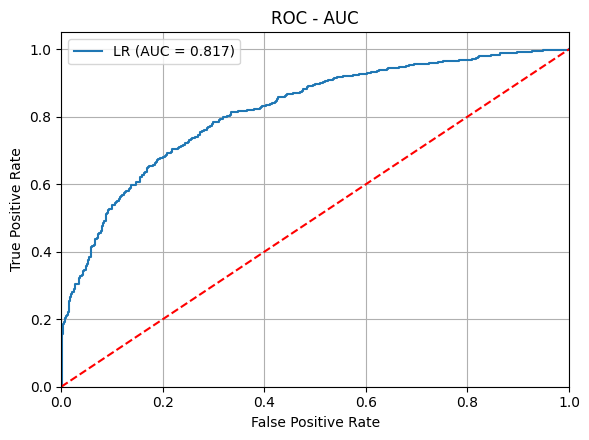

In [78]:
# ROC - AUC Curve for LR Model

# Predict probabilities for the test set
y_pred_lr_prob = lr_model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
lr_roc_auc = roc_auc_score(y_test, y_pred_lr_prob)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr_prob)

# Plot ROC -AUC
plot_roc_curve(fpr_lr, tpr_lr, lr_roc_auc, model_name='LR')

### KNN Model

In [80]:
# Initialize the model
knn = KNeighborsClassifier()

#### Hyperparameter Tuning for KNN Model

In [81]:
# Searching for the best hyperparametres with GridSearchCV method

knn_params = {
    "n_neighbors": np.arange(1, 50),
    "weights": ["uniform", "distance"],
    "leaf_size": [5, 10, 15, 20]
}

# Set up GridSearchCV
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
# Fit GridSearchCV
knn_cv_model.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [5, 10, 15, 20],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [82]:
# Get Best Parameters of KNN Model
print("Best score for train set: " + str(knn_cv_model.best_score_))

print('-----' * 10)

print("Best K value: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nBest weights: " + knn_cv_model.best_params_["weights"],
     "\nBest leaf size: " + str(knn_cv_model.best_params_["leaf_size"]))

Best score for train set: 0.8197020898176965
--------------------------------------------------
Best K value: 47 
Best weights: distance 
Best leaf size: 5


In [83]:
# KNN with Best Parameters
knn_model = KNeighborsClassifier(
    n_neighbors = knn_cv_model.best_params_["n_neighbors"],
    weights = knn_cv_model.best_params_["weights"],
    leaf_size = knn_cv_model.best_params_["leaf_size"])

knn_model.fit(x_train_scaled, y_train)

KNeighborsClassifier(leaf_size=5, n_neighbors=np.int64(47), weights='distance')

#### Model Evaluation

In [84]:
# Model Evaluation
y_pred_knn = knn_model.predict(x_test_scaled)
print(f'Accuracy score on the test set : {accuracy_score(y_test, y_pred_knn)}')

Accuracy score on the test set : 0.8123076923076923


              precision    recall  f1-score   support

           0       0.82      0.66      0.73       502
           1       0.81      0.91      0.86       798

    accuracy                           0.81      1300
   macro avg       0.81      0.78      0.79      1300
weighted avg       0.81      0.81      0.81      1300



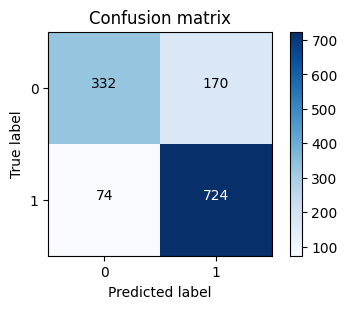

In [85]:
# Classification Report of KNN Model
print(classification_report(y_test, y_pred_knn))

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_knn))

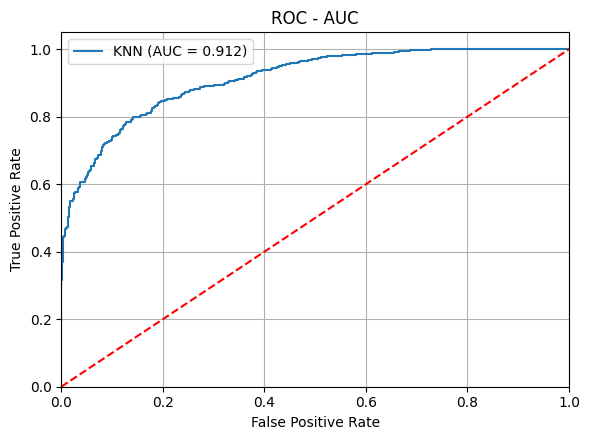

In [86]:
# ROC - AUC Curve for KNN Model

# Predict probabilities for the test set
y_pred_knn_prob = knn_model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
knn_roc_auc = roc_auc_score(y_test, y_pred_knn_prob)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn_prob)

# Plot ROC -AUC
plot_roc_curve(fpr_knn, tpr_knn, knn_roc_auc, model_name='KNN')

**Metrics Explained:**
- **Precision :** Indicates the proportion of positive identifications that were actually correct.
- **Recall :** Indicates the proportion of actual positives that were correctly identified by the model.
- **F1-Score :** The harmonic mean of precision and recall, providing a single metric that balances both.

**Interpretation:**

Let’s recall that Class 0 corresponds to wine quality ratings from 3 to 5, while Class 1 corresponds to wine ratings from 6 to 9.
- Class 0:
    - Precision : Of all instances predicted as Class 0, 82% are actually Class 0. This indicates a high level of accuracy for the predictions made for Class 0.
    - Recall : Of all actual Class 0 instances, 66% were correctly predicted as Class 0. This indicates that the model misses some Class 0 instances.
    - F1-Score : The harmonic mean of precision and recall for Class 0 is 0.73, showing a reasonable balance but indicating that there is room for improvement in recall.
- Class 1:
    - Precision : Of all instances predicted as Class 1, 81% are actually Class 1. This shows that the model is consistent in its precision across both classes.
    - Recall : Of all actual Class 1 instances, 91% were correctly predicted as Class 1. This suggests that the model is very effective at identifying Class 1 instances.
    - F1-Score : The harmonic mean of precision and recall for Class 1 is 0.86, indicating strong performance with a high balance between precision and recall.

**Conclusion:**
- **Overall Accuracy:** The model correctly classifies 81% of wines.
- **Precision:** 0.82 for class 0 and 0.81 for class 1, indicating the model is slightly more accurate in predicting class 0 (lower quality wines) than class 1 (higher quality wines).
- **Class 0 (Quality 1-5):** Lower recall of 66%, suggesting the model misses more lower quality wines.
- **Class 1 (Quality 6-10):** High recall of 91%, demonstrating strong performance in identifying higher quality wines.
- **AUC:** A high AUC of 0.912, reflecting excellent overall ability to distinguish between the two classes.

**_Overall, the model is effective at identifying higher quality wines but needs improvement in classifying lower quality wines. The high AUC (0.912) reflects strong overall performance in class distinction._**

### Random Forest Classifier

In [88]:
# Initialize the model
rf = RandomForestClassifier()

In [89]:
# Searching for the best hyperparametres with GridSearchCV method
rf_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
rf_cv_model = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1)
# Fit GridSearchCV
rf_cv_model.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]})

In [90]:
# Get Best Parameters of RF Model
print("Best score for train set: " + str(rf_cv_model.best_score_))

print("-----" * 10)

print("best n_estimators value: " + str(rf_cv_model.best_params_["n_estimators"]),
     "\nbest max_depth value: " + str(rf_cv_model.best_params_["max_depth"]),
     "\nbest min_samples_split value: " + str(rf_cv_model.best_params_["min_samples_split"]))

Best score for train set: 0.828551578479324
--------------------------------------------------
best n_estimators value: 100 
best max_depth value: None 
best min_samples_split value: 2


In [91]:
# Build RF Model with Best Parameters
best_rf = RandomForestClassifier(
    n_estimators = rf_cv_model.best_params_["n_estimators"],
    max_depth = rf_cv_model.best_params_["max_depth"],
    min_samples_split = rf_cv_model.best_params_["min_samples_split"],
    random_state = 5
)
rf_model = best_rf.fit(x_train_scaled, y_train)

In [92]:
# Accuracy Score of RF Model on Test set
y_pred_rf = rf_model.predict(x_test_scaled)
print(f'Accuracy score on the test set : {accuracy_score(y_test, y_pred_rf)}')

Accuracy score on the test set : 0.8438461538461538


              precision    recall  f1-score   support

           0       0.84      0.74      0.79       502
           1       0.85      0.91      0.88       798

    accuracy                           0.84      1300
   macro avg       0.84      0.82      0.83      1300
weighted avg       0.84      0.84      0.84      1300



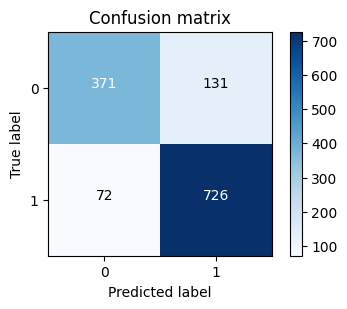

In [93]:
# Classification Report of RF Model
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf))

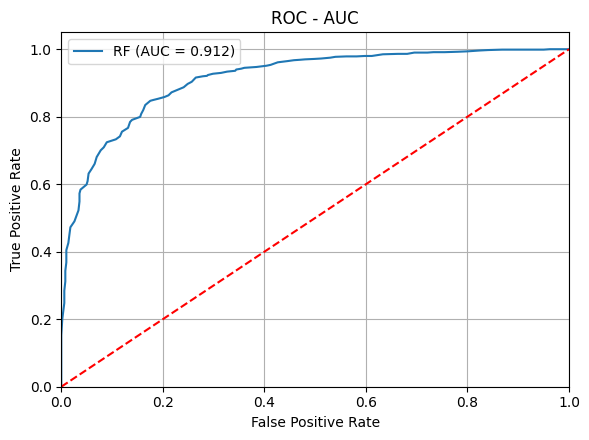

In [94]:
# ROC - AUC for RF Model

# Predict probabilities for the test set
y_pred_rf_prob = rf_model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
rf_roc_auc = roc_auc_score(y_test, y_pred_rf_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)

# Plot ROC - AUC
plot_roc_curve(fpr_rf, tpr_rf, rf_roc_auc, model_name='RF')

**Conclusion:**

- **Overall Accuracy:** The model achieves 84% accuracy in classifying wines.
- **Precision:** 0.84 for class 0 and 0.85 for class 1, indicating slightly higher accuracy in predicting class 1 (higher quality wines).
- **Class 0:** Precision of 0.84 and recall of 0.74, showing the model is fairly accurate but misses some lower quality wines.
- **Class 1:** Precision of 0.85 and recall of 0.91, demonstrating strong performance in identifying higher quality wines.
- **AUC:** A high AUC of 0.912, reflecting excellent overall ability to distinguish between the two classes.

**_Overall, the model performs well with balanced accuracy, high effectiveness in identifying higher quality wines, and excellent class distinction._**

### Gradient Boosting Machines

In [96]:
# Instantiate the model
gbm = GradientBoostingClassifier()

In [97]:
# Searching for the best hyperparametres with GridSearchCV method
gbm_params = {"learning_rate": [0.005, 0.008, 0.1, 0.15],
              "n_estimators": [100, 300, 500],
              "max_depth": [2, 3, 4],
              "min_samples_split": [2, 3, 4]}

# Set up GridSearchCV
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1)
# Fit GridSearchCV
gbm_cv_model.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.008, 0.1, 0.15],
                         'max_depth': [2, 3, 4], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 300, 500]})

In [98]:
# Get Best Parameters of GBM Model
print("Best score for train set: " + str(gbm_cv_model.best_score_))

print("-----" * 10)

print("best n_estimators value: " + str(gbm_cv_model.best_params_["n_estimators"]),
     "\nbest learning_rate value: " + str(gbm_cv_model.best_params_["learning_rate"]),
     "\nbest max_depth value: " + str(gbm_cv_model.best_params_["max_depth"]),
     "\nbest min_samples_split value: " + str(gbm_cv_model.best_params_["min_samples_split"]))

Best score for train set: 0.8085456499184822
--------------------------------------------------
best n_estimators value: 500 
best learning_rate value: 0.15 
best max_depth value: 4 
best min_samples_split value: 4


In [99]:
# Build GBM Model with Best Parameters
gbm = GradientBoostingClassifier(
    n_estimators = gbm_cv_model.best_params_["n_estimators"],
    learning_rate = gbm_cv_model.best_params_["learning_rate"],
    max_depth = gbm_cv_model.best_params_["max_depth"],
    min_samples_split = gbm_cv_model.best_params_["min_samples_split"],
    random_state = 5
)
gbm_model = gbm.fit(x_train_scaled, y_train)

In [100]:
# Accuracy Score of GBM Model on Test set
y_pred_gbm = gbm_model.predict(x_test_scaled)
print(f'Accuracy score on the test set : {accuracy_score(y_test, y_pred_gbm)}')

Accuracy score on the test set : 0.813076923076923


              precision    recall  f1-score   support

           0       0.78      0.72      0.75       502
           1       0.83      0.87      0.85       798

    accuracy                           0.81      1300
   macro avg       0.81      0.80      0.80      1300
weighted avg       0.81      0.81      0.81      1300



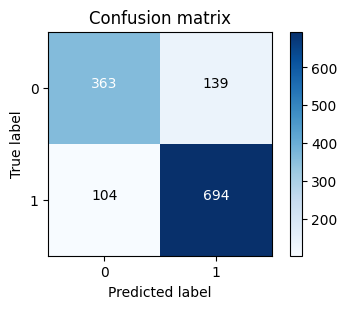

In [101]:
# Classification Report of GBM Model
print(classification_report(y_test, y_pred_gbm))

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_gbm))

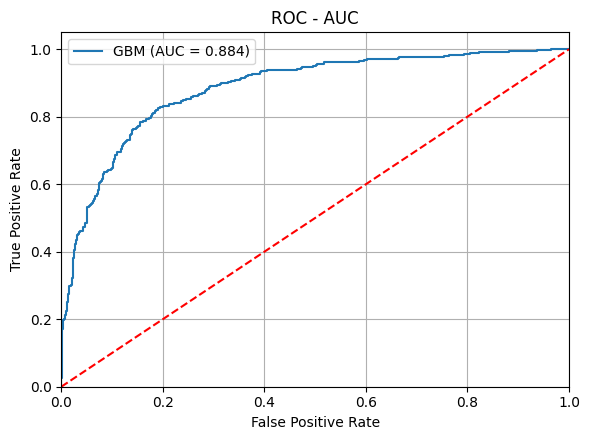

In [102]:
# ROC - AUC Curve for GBM Model

# Predict probabilities for the test set
y_pred_gbm_prob = gbm_model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
gbm_roc_auc = roc_auc_score(y_test, y_pred_gbm_prob)
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, y_pred_gbm_prob)

# Plot ROC - AUC
plot_roc_curve(fpr_gbm, tpr_gbm, gbm_roc_auc, model_name='GBM')

### Light GBM Model

In [104]:
# Instantiate the model
lgbm = LGBMClassifier()

In [105]:
# Searching for the best hyperparameters using the GridSearchCV method
lgbm_params = {
    "n_estimators": [100, 300, 500],
    "learning_rate": [0.05, 0.08, 0.1, 0.12, 0.15, 0.2],
    "max_depth": [-1, 3, 4],
    "min_child_samples": [15, 20, 25, 30]
}

# Set up GridSearchCV
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv = 10, n_jobs = -1)
# Fit GridSearchCV
lgbm_cv_model.fit(x_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 3315, number of negative: 1882
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.637868 -> initscore=0.566123
[LightGBM] [Info] Start training from score 0.566123


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.08, 0.1, 0.12, 0.15, 0.2],
                         'max_depth': [-1, 3, 4],
                         'min_child_samples': [15, 20, 25, 30],
                         'n_estimators': [100, 300, 500]})

In [106]:
# Get Best Parameters of Light GBM Model
print("Best score for train set: " + str(lgbm_cv_model.best_score_))

print("-----" * 10)

print("best n_estimators value: " + str(lgbm_cv_model.best_params_["n_estimators"]),
     "\nbest learning_rate value: " + str(lgbm_cv_model.best_params_["learning_rate"]),
     "\nbest max_depth value: " + str(lgbm_cv_model.best_params_["max_depth"]),
     "\nbest min_child_samples value: " + str(lgbm_cv_model.best_params_["min_child_samples"]))

Best score for train set: 0.818164739884393
--------------------------------------------------
best n_estimators value: 500 
best learning_rate value: 0.05 
best max_depth value: -1 
best min_child_samples value: 15


In [107]:
# Build Light GBM Model with Best Parameters
lgbm = LGBMClassifier(
    n_estimators = lgbm_cv_model.best_params_["n_estimators"],
    learning_rate = lgbm_cv_model.best_params_["learning_rate"],
    max_depth = lgbm_cv_model.best_params_["max_depth"],
    min_child_samples = lgbm_cv_model.best_params_["min_child_samples"],
    random_state = 5
)
lgbm_model = lgbm.fit(x_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 3315, number of negative: 1882
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1541
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.637868 -> initscore=0.566123
[LightGBM] [Info] Start training from score 0.566123


In [108]:
# Accuracy Score of Light GBM Model on Test set
y_pred_lgbm = lgbm_model.predict(x_test_scaled)
print(f'Accuracy score on the test set : {accuracy_score(y_test, y_pred_lgbm)}')

Accuracy score on the test set : 0.8261538461538461


              precision    recall  f1-score   support

           0       0.80      0.74      0.77       502
           1       0.84      0.88      0.86       798

    accuracy                           0.83      1300
   macro avg       0.82      0.81      0.81      1300
weighted avg       0.82      0.83      0.82      1300



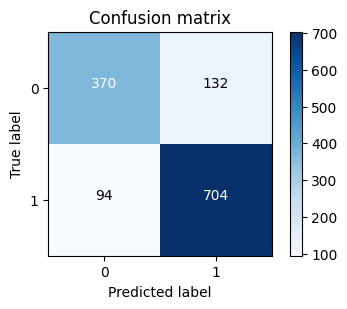

In [109]:
# Classification Report of Light GBM Model
print(classification_report(y_test, y_pred_lgbm))

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_lgbm))

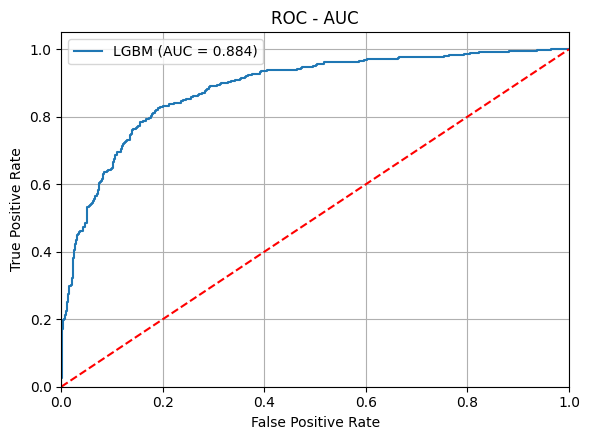

In [110]:
# ROC - AUC Curve for LGBM Model

# Predict probabilities for the test set
y_pred_lgbm_prob = gbm_model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
lgbm_roc_auc = roc_auc_score(y_test, y_pred_lgbm_prob)
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_pred_lgbm_prob)

# Plot ROC - AUC
plot_roc_curve(fpr_lgbm, tpr_lgbm, lgbm_roc_auc, model_name='LGBM')

### XGBClassifier Model

In [112]:
# Initialize the model
xgb = XGBClassifier()

In [113]:
# Searching for the best hyperparameters using the GridSearchCV method
xgb_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10]
}

# Set up GridSearchCV
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1)
# Fit GridSearchCV
xgb_cv_model.fit(x_train_scaled, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 5, 10],
                         'n_estimators': [100, 300, 500]})

In [114]:
# Get Best Parameters of XGB Model
print("Best score for train set: " + str(xgb_cv_model.best_score_))

print("-----" * 10)

print("best n_estimators value: " + str(xgb_cv_model.best_params_["n_estimators"]),
     "\nbest learning_rate value: " + str(xgb_cv_model.best_params_["learning_rate"]),
     "\nbest max_depth value: " + str(xgb_cv_model.best_params_["max_depth"]),
     "\nbest min_child_weight value: " + str(xgb_cv_model.best_params_["min_child_weight"]))

Best score for train set: 0.8133544538313323
--------------------------------------------------
best n_estimators value: 300 
best learning_rate value: 0.1 
best max_depth value: 7 
best min_child_weight value: 1


In [115]:
# Build XGB Model with Best Parameters
xgb = XGBClassifier(
    n_estimators = xgb_cv_model.best_params_["n_estimators"],
    learning_rate = xgb_cv_model.best_params_["learning_rate"],
    max_depth = xgb_cv_model.best_params_["max_depth"],
    min_child_samples = xgb_cv_model.best_params_["min_child_weight"]
)
xgb_model = xgb.fit(x_train_scaled, y_train)

In [116]:
# Accuracy Score of Light GBM Model on Test set
y_pred_xgb = xgb_model.predict(x_test_scaled)
print(f'Accuracy score on the test set : {accuracy_score(y_test, y_pred_xgb)}')

Accuracy score on the test set : 0.8238461538461539


              precision    recall  f1-score   support

           0       0.80      0.73      0.76       502
           1       0.84      0.89      0.86       798

    accuracy                           0.82      1300
   macro avg       0.82      0.81      0.81      1300
weighted avg       0.82      0.82      0.82      1300



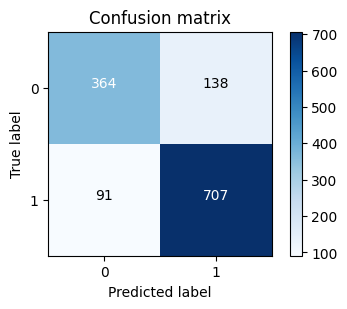

In [117]:
# Classification Report of Light GBM Model
print(classification_report(y_test, y_pred_xgb))

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_xgb))

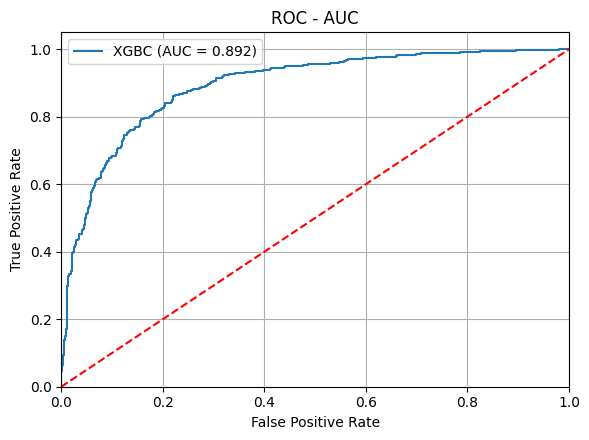

In [118]:
# ROC - AUC Curve for XGB Model

# Predict probabilities for the test set
y_pred_xgb_prob = xgb_model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgb_prob)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb_prob)

# Plot ROC - AUC
plot_roc_curve(fpr_xgb, tpr_xgb, xgb_roc_auc, model_name='XGBC')

#### ROC Curve - Models Comparaison

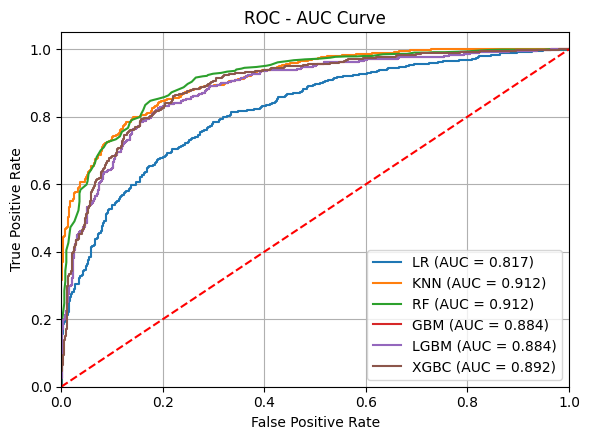

In [120]:
fig, ax = plt.subplots(figsize=(6, 4.5))

ax.plot(fpr_lr, tpr_lr, label= f'LR (AUC = {lr_roc_auc:0.3f})')
ax.plot(fpr_knn, tpr_knn, label= f'KNN (AUC = {knn_roc_auc:0.3f})')
ax.plot(fpr_rf, tpr_rf, label= f'RF (AUC = {rf_roc_auc:0.3f})')
ax.plot(fpr_gbm, tpr_gbm, label= f'GBM (AUC = {gbm_roc_auc:0.3f})')
ax.plot(fpr_lgbm, tpr_lgbm, label= f'LGBM (AUC = {lgbm_roc_auc:0.3f})')
ax.plot(fpr_xgb, tpr_xgb, label= f'XGBC (AUC = {xgb_roc_auc:0.3f})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC - AUC Curve")
ax.grid()
ax.legend()
fig.tight_layout()

### Global Model Observation

We have trained and evaluated six models on our dataset. Some experiments are not visible in this notebook.
- We tested the MinMaxScaler for data normalization, but the results were not satisfactory.
- We also attempted to handle outliers, but all our models exhibited overfitting. Using our best normalization technique, RobustScaler, we achieved the following results:
    - Logistic Regression: 75.99% on training and 71.30% on testing
    - KNN: 83.46% on training and 75.23% on testing
    - Random Forest: 83.72% on training and 75.53% on testing
    - Gradient Boosting Machines: 84.47% on training and 74.15% on testing
    - LGBM Classifier: 84.40% on training and 75.53% on testing
    - XGB Classifier: 83.28% on training and 73.69% on testing.
- We noticed that the Pearson correlation test showed significant relationships between most variable pairs, suggesting that these relationships are likely real and not random. Therefore, we concluded that handling outliers may not be necessary in this case. This highlights the importance of conducting correlation tests during the Exploratory Data Analysis (EDA) phase.

**Among all our models, Random Forest emerged as the best performer. To clarify, Class 0 corresponds to wine quality ratings from 3 to 5, while Class 1 corresponds to wine ratings from 6 to 9.**
- The model demonstrates strong performance across all metrics, achieving an accuracy of 84.38% and a ROC-AUC of 0.912, indicating excellent ability to distinguish between different wine quality ratings.
- Class 1 (ratings from 6 to 9) is predicted slightly more accurately than Class 0 (ratings from 1 to 5), but the model maintains a good overall balance in terms of precision and recall across both classes.
- The confusion matrix reveals that the model struggles slightly with false positives (131 instances), but overall, it classifies both wine quality categories effectively.

# Conclusion

We utilized the Wine Quality datasets from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/186/wine+quality) to perform machine learning modeling. Our process included data preparation, exploratory data analysis (EDA), data preprocessing, modeling, and evaluation.

Key steps included:
- Adding a new variable, 'wine_type,' which was weakly correlated with the target variable.
Considering all variables for modeling as none showed a moderate or strong correlation with the target variable.
- Features Used: 'fixed_acidity,' 'volatile_acidity,' 'citric_acid,' 'residual_sugar,' 'chlorides,' 'free_sulfur_dioxide,' 'total_sulfur_dioxide,' 'density,' 'pH,' 'sulphates,' 'alcohol,' 'wine_type.'
- Target Variable: 'quality.'

We evaluated six models: Logistic Regression, K-Nearest Neighbor, Random Forest, Gradient Boosting Machines, Light GBM Classifier, and XGB Classifier.

**Overall, the Random Forest model emerged as the most effective at distinguishing between higher and lower quality wines, achieving an accuracy of 84.38% and a ROC-AUC of 0.912 on the test set, demonstrating strong overall performance.**